In [2]:
import numpy as np
import scipy as sp
from scipy.signal import savgol_filter
from matplotlib.ticker import ScalarFormatter

import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_theme()

In [3]:
raw_df = pd.read_csv("./data/feb-1-multi-sensor-deploy-test-second.txt", names=["anchor_0", "anchor_1", "anchor_2"])

In [4]:
raw_df

anchor_0     anchor_1     anchor_2
0      2797.252441  2672.988770  2788.271240
1      2797.286133  2672.992432  2788.274902
2      2797.237549  2672.947510  2788.274902
3      2797.226318  2672.947510  2788.260010
4      2797.211182  2672.932617  2788.211182
...            ...          ...          ...
15893  2797.260010  2673.067383  2788.353760
15894  2797.248779  2673.037598  2788.342529
15895  2797.267578  2673.052490  2788.331299
15896  2797.286133  2673.086182  2788.342529
15897  2797.290039          NaN          NaN

[15898 rows x 3 columns]

In [5]:

def moving_average(data, window_size):
    # Create a window/kernel for the moving average
    window = np.ones(window_size) / window_size
    # Apply convolution between your data and the window
    smoothed_data = np.convolve(data, window, mode='valid')
    return smoothed_data

In [6]:
np.linspace(0,15848, 15848)

array([0.00000000e+00, 1.00006310e+00, 2.00012621e+00, ...,
       1.58459999e+04, 1.58469999e+04, 1.58480000e+04])

In [40]:
def plot_3_channels(raw_df, filtering=False, filter_func=savgol_filter, window_length=51, polyorder=2, no_of_anchors_to_plot=3):
    from matplotlib.ticker import ScalarFormatter

    # Create a figure and a set of subplots
    fig, axs = plt.subplots(no_of_anchors_to_plot, 1, figsize=(10, 15), dpi=200)

    # Define a plain number formatter
    formatter = ScalarFormatter(useOffset=False)

    for i, column in enumerate(raw_df.columns):

        if (i + 1 > no_of_anchors_to_plot):
            continue

        # check if filtering is required for the drawing
        # if YES, run the filtering algo before execute the drawing commands
        data = raw_df[column]
        if (filtering):
            data = filter_func(data, window_length, polyorder)

        axs[i].plot(raw_df.index, data)
        if (filtering): axs[i].set_title(column + " smoothed with savgol filter: window len of 51")
        else : axs[i].set_title(column + " no filtering")
        axs[i].set_xlabel("Samples(100 samples/sec)")
        axs[i].set_ylabel('Field Strength(mV)')

        # Apply plain number format to both x and y axis
        axs[i].xaxis.set_major_formatter(formatter)
        axs[i].yaxis.set_major_formatter(formatter)

    # Adjust the layout
    plt.tight_layout()

    # Display the plot
    plt.show()



def plot_3_channels_with_gradients(raw_df, filtering=True, window_length=51, polyorder=2):
    # Create a figure and a set of subplots
    fig, axs = plt.subplots(6, 1, figsize=(10, 12), dpi=200)  # 6 subplots for 3 channels and their gradients

    # Define a plain number formatter
    formatter = ScalarFormatter(useOffset=False)

    for i, column in enumerate(raw_df.columns[:3]):  # Assume first 3 columns are channels
        data = raw_df[column]
        if filtering:
            data = savgol_filter(data, window_length, polyorder)
        
        # Calculate the gradient
        gradient = np.gradient(data)

        # Plot the original data
        axs[2*i].plot(raw_df.index, data, label=f'Original Data')
        axs[2*i].set_title(f'{column} Data')
        axs[2*i].set_ylabel('Field Strength (mV)')
        axs[2*i].xaxis.set_major_formatter(formatter)
        axs[2*i].yaxis.set_major_formatter(formatter)

        # Plot the gradient
        axs[2*i + 1].plot(raw_df.index, gradient, label='Gradient', color='orange')
        axs[2*i + 1].set_title(f'{column} Gradient')
        axs[2*i + 1].set_ylabel('Gradient (mV/sample)')
        axs[2*i + 1].xaxis.set_major_formatter(formatter)
        axs[2*i + 1].yaxis.set_major_formatter(formatter)

    # Set the xlabel for the last subplot only
    axs[-1].set_xlabel('Samples (100 samples/sec)')

    # Add legends
    for ax in axs:
        ax.legend()

    plt.tight_layout()
    plt.show()

# Assuming raw_df is your DataFrame with the data
# plot_3_channels_with_gradients(raw_df)



In [8]:
raw_df_first = pd.read_csv("./data/feb-1-multi-sensor-deploy-test.txt", names=["anchor_0", "anchor_1", "anchor_2"])
raw_df_second = pd.read_csv("./data/feb-1-multi-sensor-deploy-test-second.txt", names=["anchor_0", "anchor_1", "anchor_2"])
raw_df_third = pd.read_csv("./data/feb-1-multi-sensor-deploy-test-no-action.txt", names=["anchor_0", "anchor_1", "anchor_2"])
raw_df_20cm_from_server_laptop_battery = pd.read_csv("./data/feb-5-multi-sensor-deploy-test-20cm-from-server-rack-laptop-battery.txt", names=["anchor_0", "anchor_1", "anchor_2"])
raw_df_20cm_from_server_power_cable = pd.read_csv("./data/feb-5-multi-sensor-deploy-test-20cm-from-server-rack-power-cable.txt", names=["anchor_0", "anchor_1", "anchor_2"])
raw_df_120cm_from_server_power_cable = pd.read_csv("./data/feb-5-multi-sensor-deploy-test-120cm-from-server-rack-power-cable.txt", names=["anchor_0", "anchor_1", "anchor_2"])
raw_df_120cm_from_server_laptop_battery = pd.read_csv("./data/feb-5-multi-sensor-deploy-test-120cm-from-server-rack-laptop-battery.txt", names=["anchor_0", "anchor_1", "anchor_2"])

raw_df_PRMM_laptop_battery_single = pd.read_csv("./data/feb-5-PRMM-single-place-remove-laptop-battery.txt", names=["anchor_0", "anchor_1", "anchor_2"])
raw_df_PRMM_laptop_battery_multiple = pd.read_csv("./data/feb-5-PRMM-multi-place-remove-laptop-battery.txt", names=["anchor_0", "anchor_1", "anchor_2"])
raw_df_PRMM_laptop_battery_multiple_bottle_height_2 = pd.read_csv("./data/feb-5-PRMM-multi-place-remove-bottle-laptop-battery-sensor-height-2-magnet-height-2cm.txt", names=["anchor_0", "anchor_1", "anchor_2"])
raw_df_PRMM_laptop_battery_multiple_bottle_height_3 = pd.read_csv("./data/feb-5-PRMM-multi-place-remove-bottle-laptop-battery-sensor-height-3-magnet-height-2cm.txt", names=["anchor_0", "anchor_1", "anchor_2"])
raw_df_PRM_laptop_battery_multiple_bottle_height_3 = pd.read_csv("./data/feb-5-PRM-multi-place-remove-bottle-laptop-battery-sensor-height-3-magnet-height-2cm.txt", names=["anchor_0", "anchor_1", "anchor_2"])
raw_df_PRM_laptop_battery_multiple_bottle_sensor_height_3_magnet_height_0cm = pd.read_csv("./data/feb-5-PRM-multi-place-remove-bottle-laptop-battery-sensor-height-3-magnet-height-0cm.txt", names=["anchor_0", "anchor_1", "anchor_2"])
raw_df_PRM_laptop_battery_multiple_no_bottle_sensor_height_3_magnet_height_0cm = pd.read_csv("./data/feb-5-PRM-multi-place-remove-no-bottle-laptop-battery-sensor-height-3-magnet-height-0cm.txt", names=["anchor_0", "anchor_1", "anchor_2"])

raw_df_PRM_cable_static = pd.read_csv("./data/feb-7-PRM-static-cable-sensor-height-3-magnet-height-0cm.txt", names=["anchor_0", "anchor_1", "anchor_2"])
raw_df_PRM_battery_static = pd.read_csv("./data/feb-7-PRM-static-battery-sensor-height-3-magnet-height-0cm.txt", names=["anchor_0", "anchor_1", "anchor_2"])
raw_df_PRM_static_PRMM_move_battery = pd.read_csv("./data/feb-7-PRM-static-PRMM-place-remove-battery-sensor-height-3-magnet-height-0cm.txt", names=["anchor_0", "anchor_1", "anchor_2"])
raw_df_PRMM_static_PRM_move_battery = pd.read_csv("./data/feb-7-PRMM-static-PRM-place-remove-battery-sensor-height-3-magnet-height-0cm.txt", names=["anchor_0", "anchor_1", "anchor_2"])



raw_df_PRM_PRMM_place_remove_3_times = pd.read_csv("./data/feb-12-PRM-and-PRMM-place-remove-3-times.txt", names=["anchor_0", "anchor_1", "anchor_2"])
raw_df_PRM_PRM_place_remove_remove_place = pd.read_csv("./data/feb-12-PRM-and-PRM-place-remove-remove-place.txt", names=["anchor_0", "anchor_1", "anchor_2"])

### plotting of AlcoMax-PRM magnet trials

* multiple placement and removal actions(3) 
* laptop battery supplied
* sensor height at position 3
* magnet height at 0 centimeter
* magnet attached to bottle


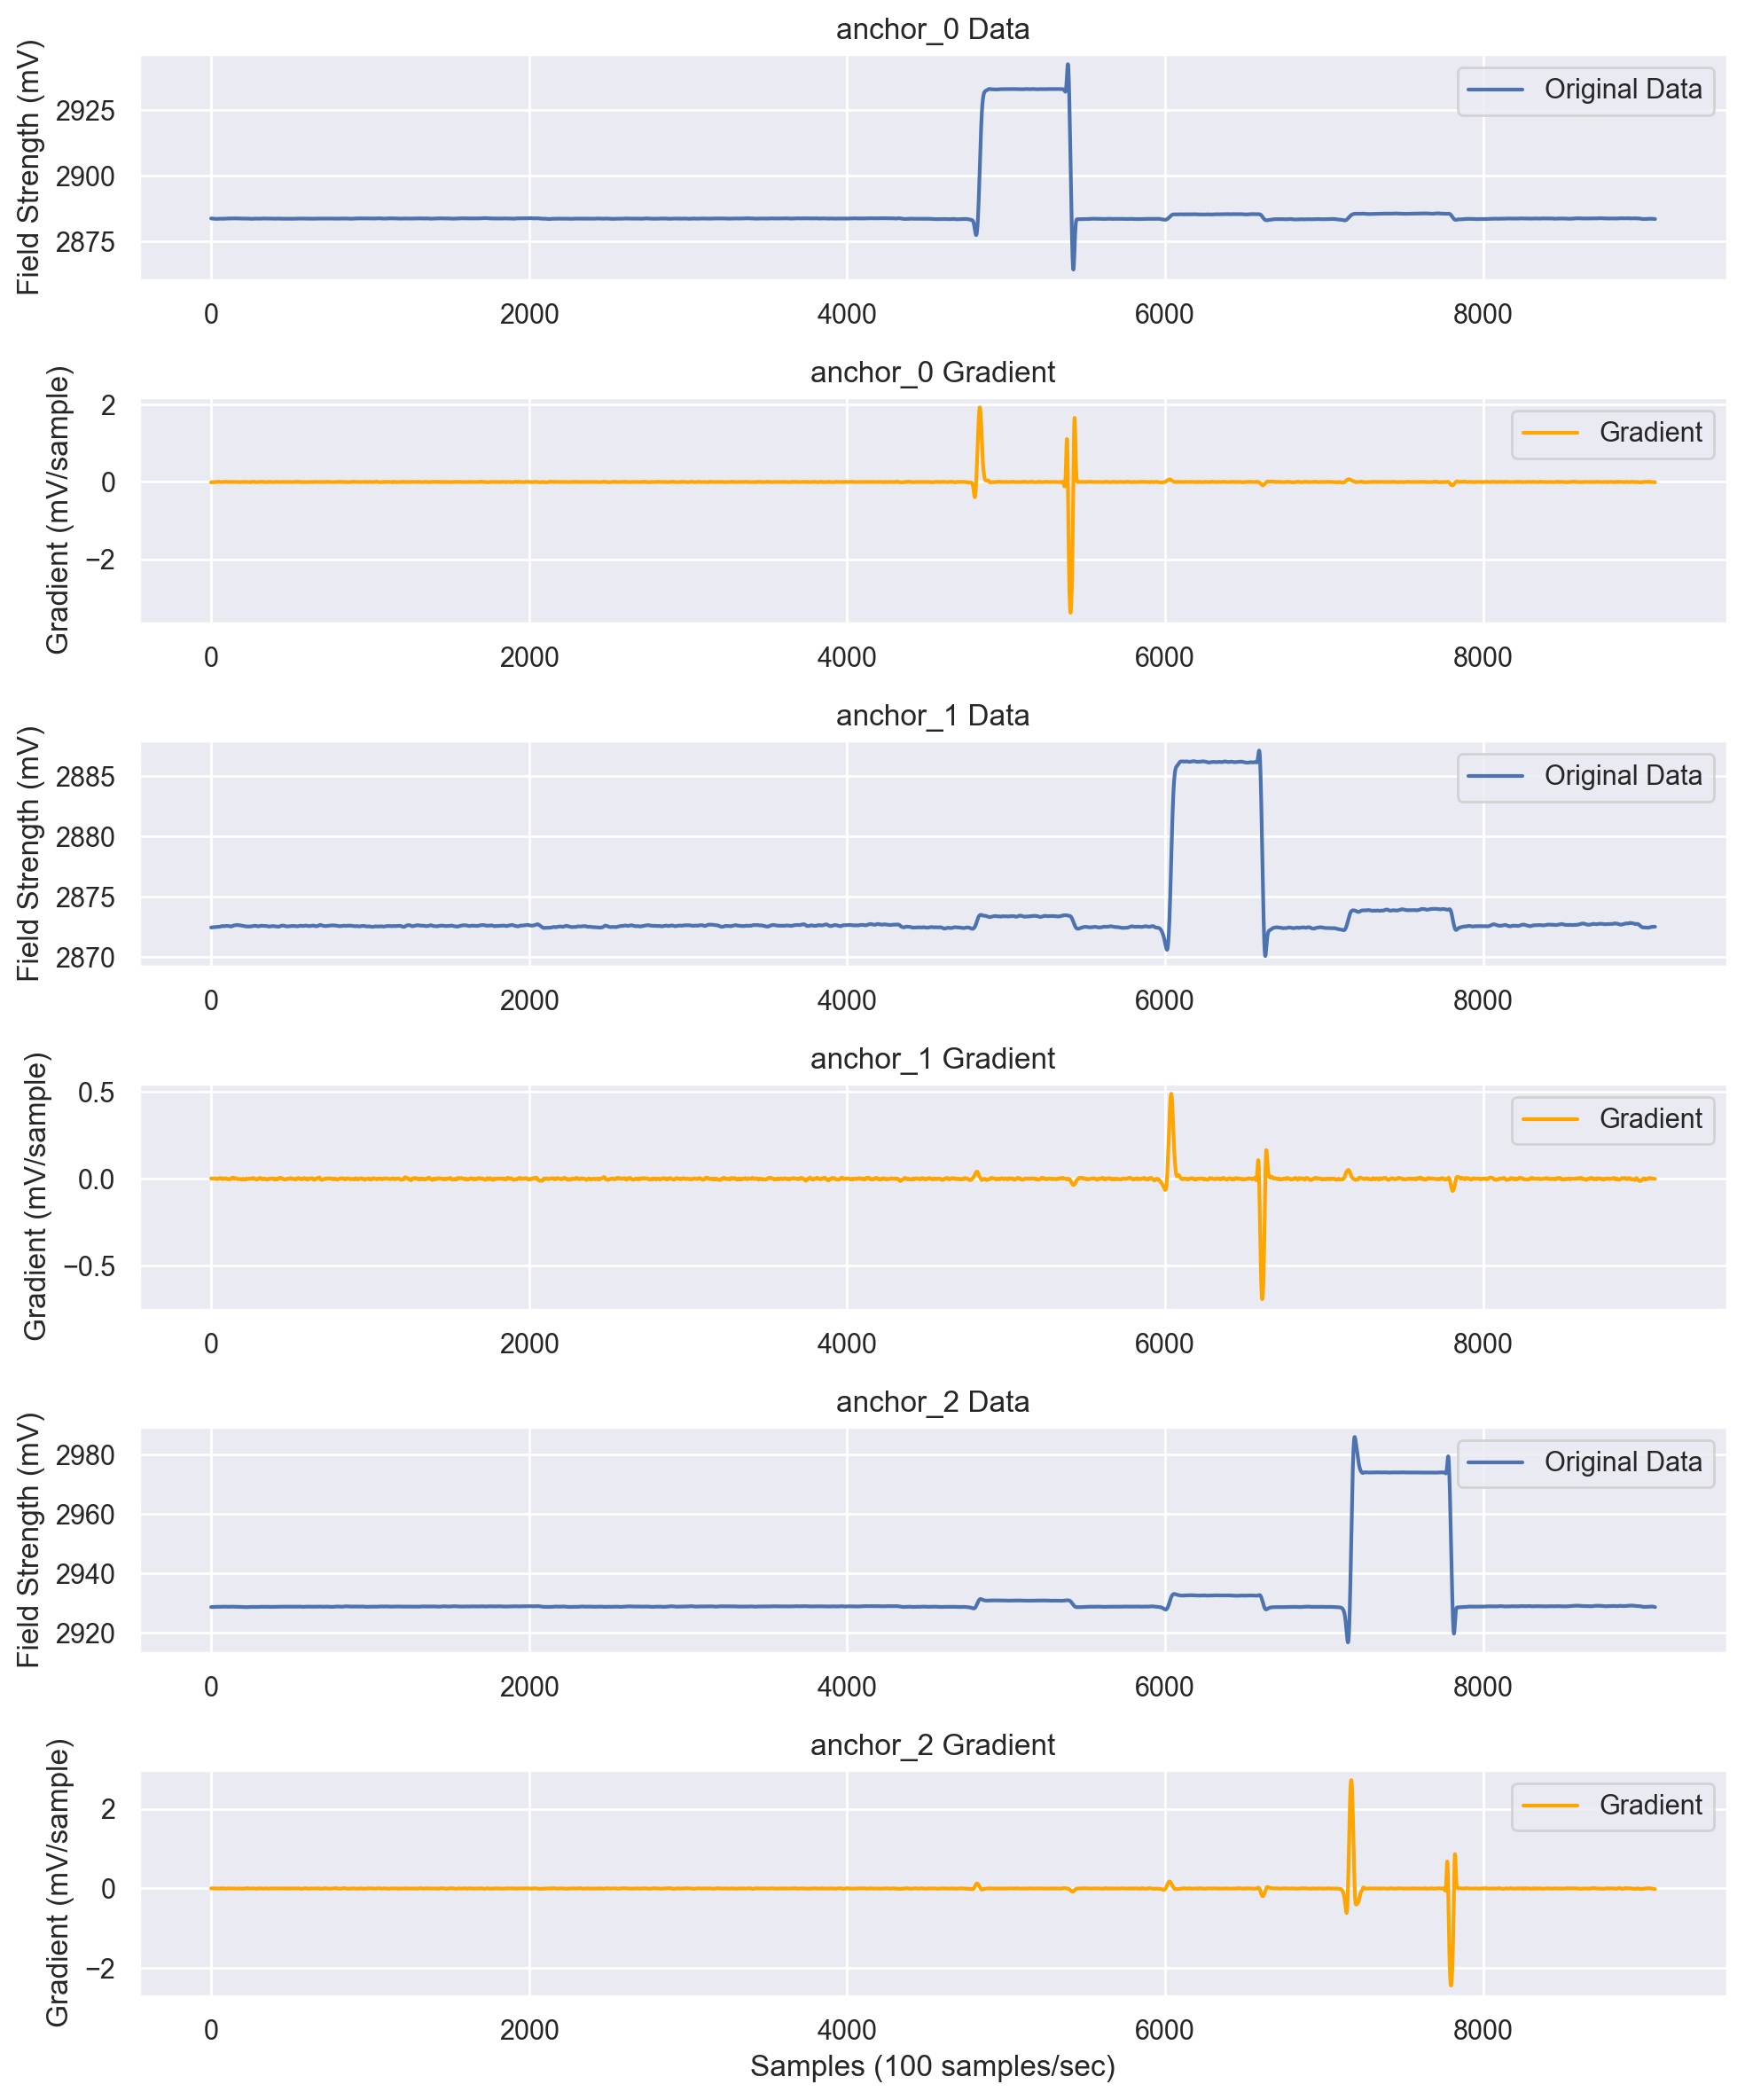

In [9]:
plot_3_channels_with_gradients(raw_df=raw_df_PRMM_static_PRM_move_battery)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate, find_peaks

def correlate_channel_template(data_stream, template, data_name, template_name, positive_template_flag=True):
    channel_data = data_stream
    channel_gradient = np.gradient(channel_data)

    # Replace negative values in the template with zeros, if flagged
    gradient_val_template = np.maximum(template, 0) if positive_template_flag else template


    # Check and handle NaNs and Infs before correlation
    if np.isnan(gradient_val_template).any() or np.isnan(channel_gradient).any():
        print("Warning: NaN values found in the data. They will be replaced with zeros.")
        gradient_val_template = np.nan_to_num(gradient_val_template)
        channel_gradient = np.nan_to_num(channel_gradient)

    if np.isinf(gradient_val_template).any() or np.isinf(channel_gradient).any():
        print("Warning: Infinite values found in the data. They will be replaced with large finite numbers.")
        gradient_val_template = np.nan_to_num(gradient_val_template, nan=0.0, posinf=np.finfo(np.float64).max, neginf=np.finfo(np.float64).min)
        channel_gradient = np.nan_to_num(channel_gradient, nan=0.0, posinf=np.finfo(np.float64).max, neginf=np.finfo(np.float64).min)

    # Perform cross-correlation
    print(channel_gradient)
    print(gradient_val_template)
    correlation = correlate(channel_gradient, gradient_val_template, mode='full')
    # print(channel_gradient)
    # print(gradient_val_template)
    # print(correlation)
    normalized_correlation = correlation / np.max(correlation)  # Normalize the correlation

    # Find both positive and negative peaks in the correlation result
    peaks_positive, _ = find_peaks(normalized_correlation, prominence=0.8)
    print(peaks_positive)
    peaks_negative, _ = find_peaks(-normalized_correlation, prominence=0.8)
    print(peaks_negative)
    # Merge and sort peaks
    peaks_corr = np.sort(np.concatenate((peaks_positive, peaks_negative)))

    # Set up subplots
    fig, axs = plt.subplots(4, 1, figsize=(10, 8), dpi=300)

    # Plot channel data and mark peaks based on correlation
    axs[0].plot(channel_data, label=f'{data_name} Data')
    for peak in peaks_corr:
        # Map correlation index to data index
        data_index = peak - len(gradient_val_template) // 2
        if 0 <= data_index < len(channel_data):
            axs[0].plot(data_index, channel_data[data_index], "x", color='red')
    axs[0].set_title(f'{data_name} Channel Data')
    axs[0].set_xlabel('Samples')
    axs[0].set_ylabel('Field Strength (mV)')

    # Plot channel gradient and mark peaks based on correlation
    axs[1].plot(channel_gradient, color='orange', label=f'{data_name} Gradient')
    for peak in peaks_corr:
        data_index = peak - len(gradient_val_template) // 2
        if 0 <= data_index < len(channel_gradient):
            axs[1].plot(data_index, channel_gradient[data_index], "x", color='red')
    axs[1].set_title(f'{data_name} Channel Gradient')
    axs[1].set_xlabel('Samples')
    axs[1].set_ylabel('Gradient (mV/sample)')

    # Plot cross-correlation result and mark peaks
    print(normalized_correlation)
    axs[2].plot(normalized_correlation, label='Normalized Correlation')
    axs[2].plot(peaks_positive, normalized_correlation[peaks_positive], "x", color='green', label='Positive Peaks')
    axs[2].plot(peaks_negative, normalized_correlation[peaks_negative], "x", color='blue', label='Negative Peaks')
    axs[2].set_title(f'Normalized Cross-Correlation between {data_name} and {template_name}')
    axs[2].set_xlabel('Lag')
    axs[2].set_ylabel('Correlation Coefficient')
    axs[2].legend(loc="lower right", prop={'size': 6})

    # Plot the template
    axs[3].plot(gradient_val_template, label='Template')
    axs[3].set_title(f'Template: {template_name}')
    axs[3].set_xlabel('Samples')
    axs[3].set_ylabel("Gradient (mV/sample)")
    axs[3].legend()

    plt.tight_layout()
    plt.show()

# Example usage
# data_stream = np.array([...])  # Your data here
# template = np.array([...])  # Your template here
# correlate_channel_template(data_stream, template, 'Data Stream', 'Template')



In [11]:
gradient_vals = np.gradient(raw_df_PRM_laptop_battery_multiple_bottle_sensor_height_3_magnet_height_0cm["anchor_2"])
gradient_val_template = np.gradient(raw_df_PRM_laptop_battery_multiple_bottle_sensor_height_3_magnet_height_0cm["anchor_0"].iloc[410:530])
gradient_val_template.shape

(120,)

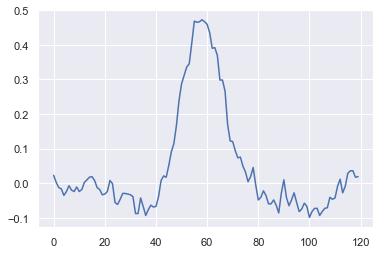

In [12]:
gradient_template_smoothed = savgol_filter(gradient_val_template, window_length=41, polyorder=2)
gradient_template_smoothed = gradient_template_smoothed[40: 80]
plt.plot(gradient_val_template)

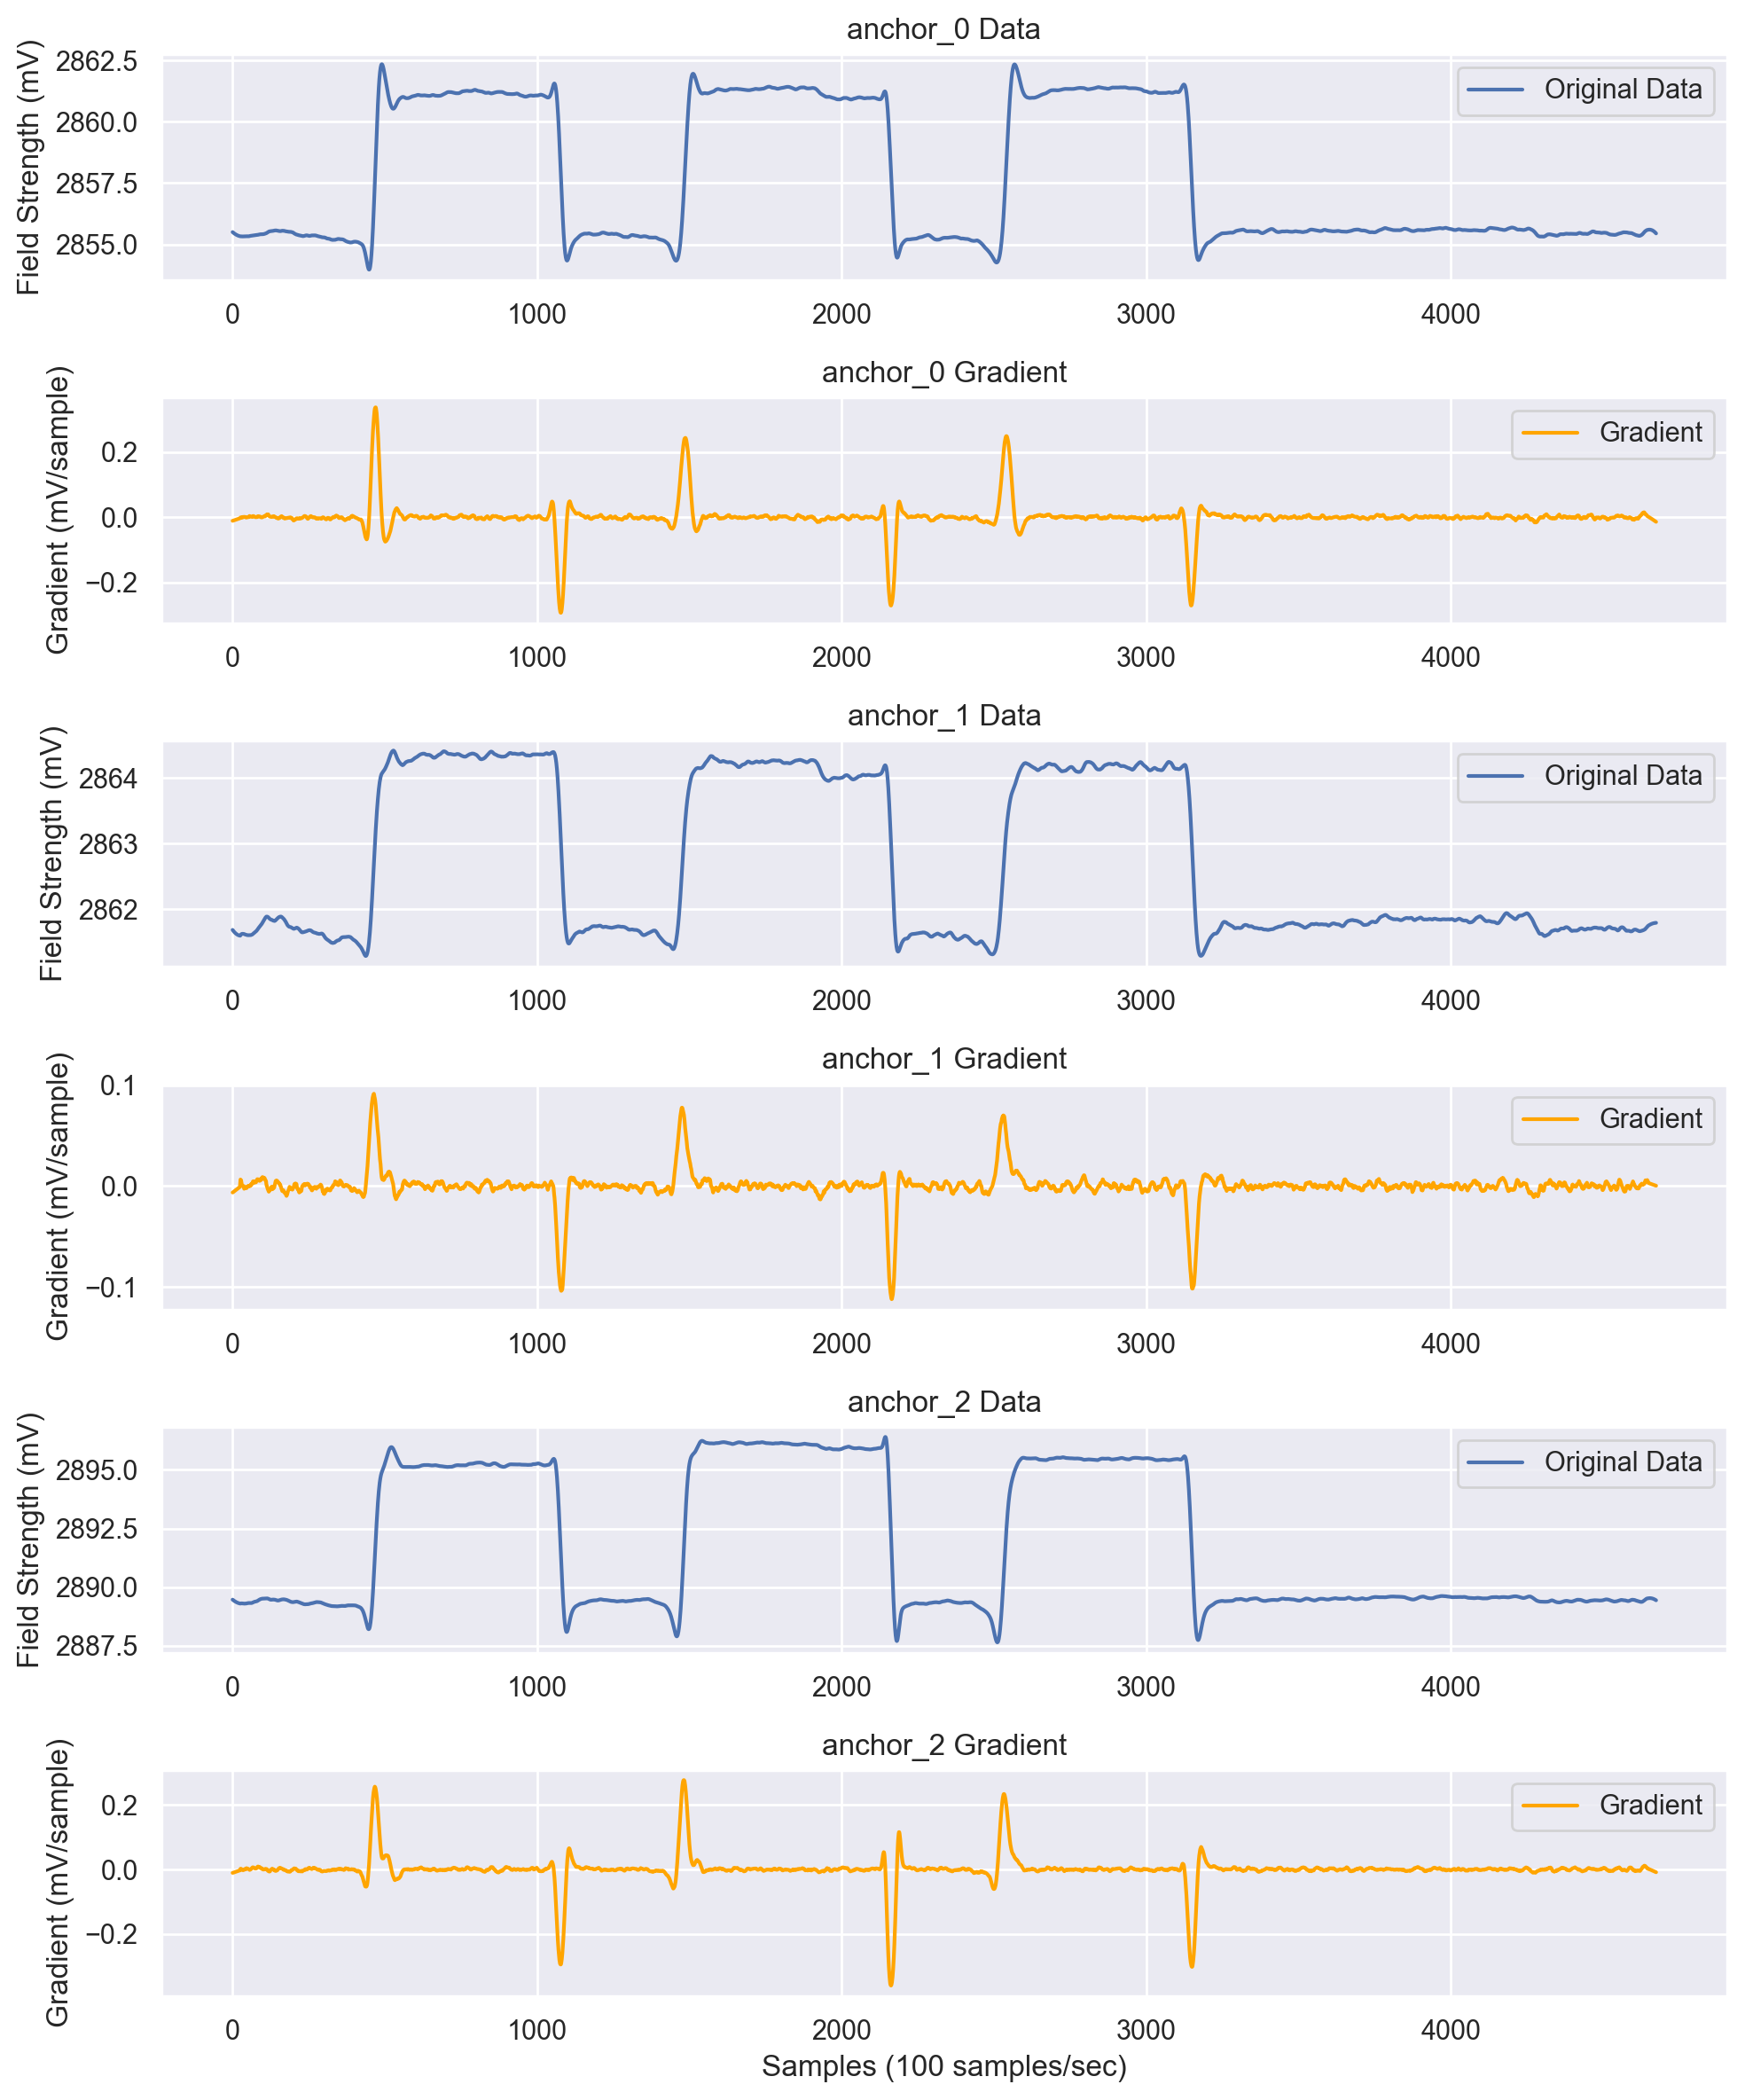

In [13]:
plot_3_channels_with_gradients(raw_df_PRM_laptop_battery_multiple_bottle_sensor_height_3_magnet_height_0cm)

[ 0.003662  -0.022583  -0.0356445 ...  0.015015  -0.0074465 -0.033692 ]
[0.         0.01319833 0.03634598 0.06184287 0.08890007 0.11679897
 0.14396695 0.17207832 0.20298658 0.23368015 0.26206879 0.28884671
 0.3133655  0.33283152 0.34967643 0.36516106 0.3770011  0.38322718
 0.38510526 0.38529779 0.38243646 0.37473715 0.36299267 0.3494299
 0.33333254 0.31314959 0.29006557 0.26560705 0.23968838 0.21102278
 0.18198959 0.15566452 0.13030413 0.10475176 0.078811   0.05656501
 0.03859707 0.02160335 0.00578511 0.        ]
[ 489 1507 2562]
[1098 2183 3168]
[ 0.00000000e+00  7.95735656e-06 -1.93566246e-05 ... -4.96877885e-04
 -1.67026322e-04  0.00000000e+00]


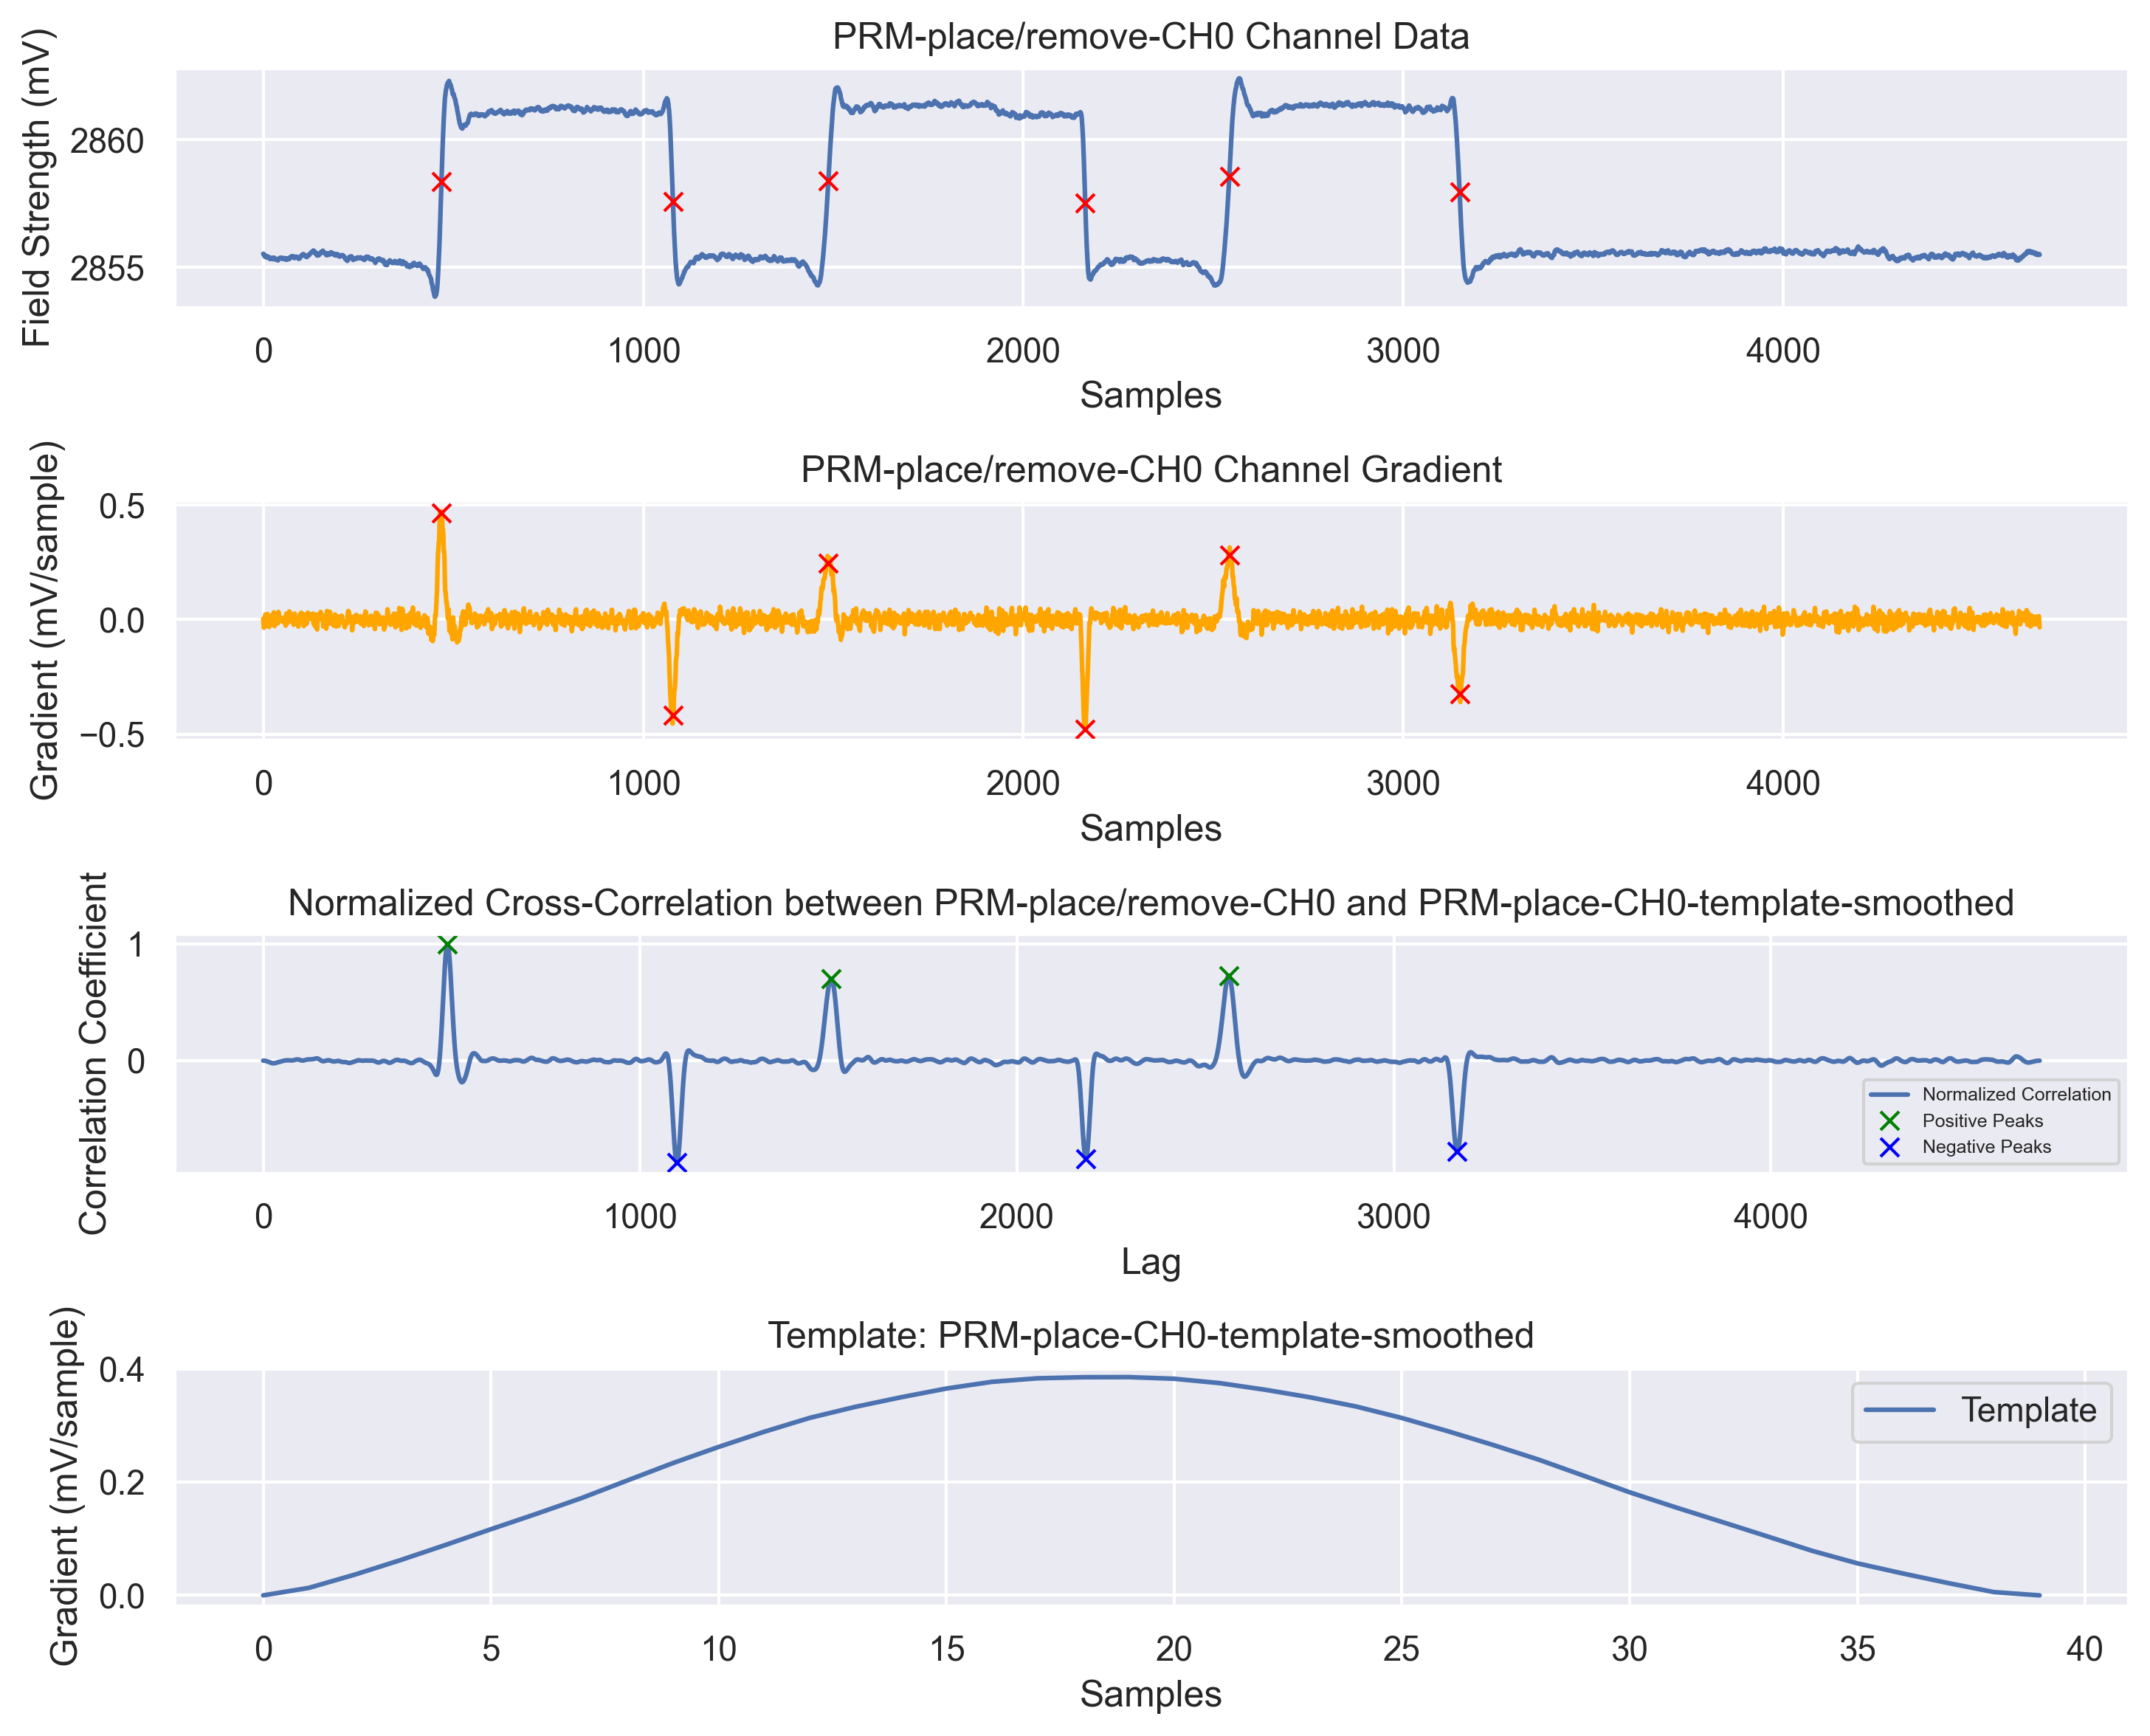

In [14]:
correlate_channel_template(raw_df_PRM_laptop_battery_multiple_bottle_sensor_height_3_magnet_height_0cm["anchor_0"], gradient_template_smoothed, "PRM-place/remove-CH0", "PRM-place-CH0-template-smoothed", positive_template_flag=True)

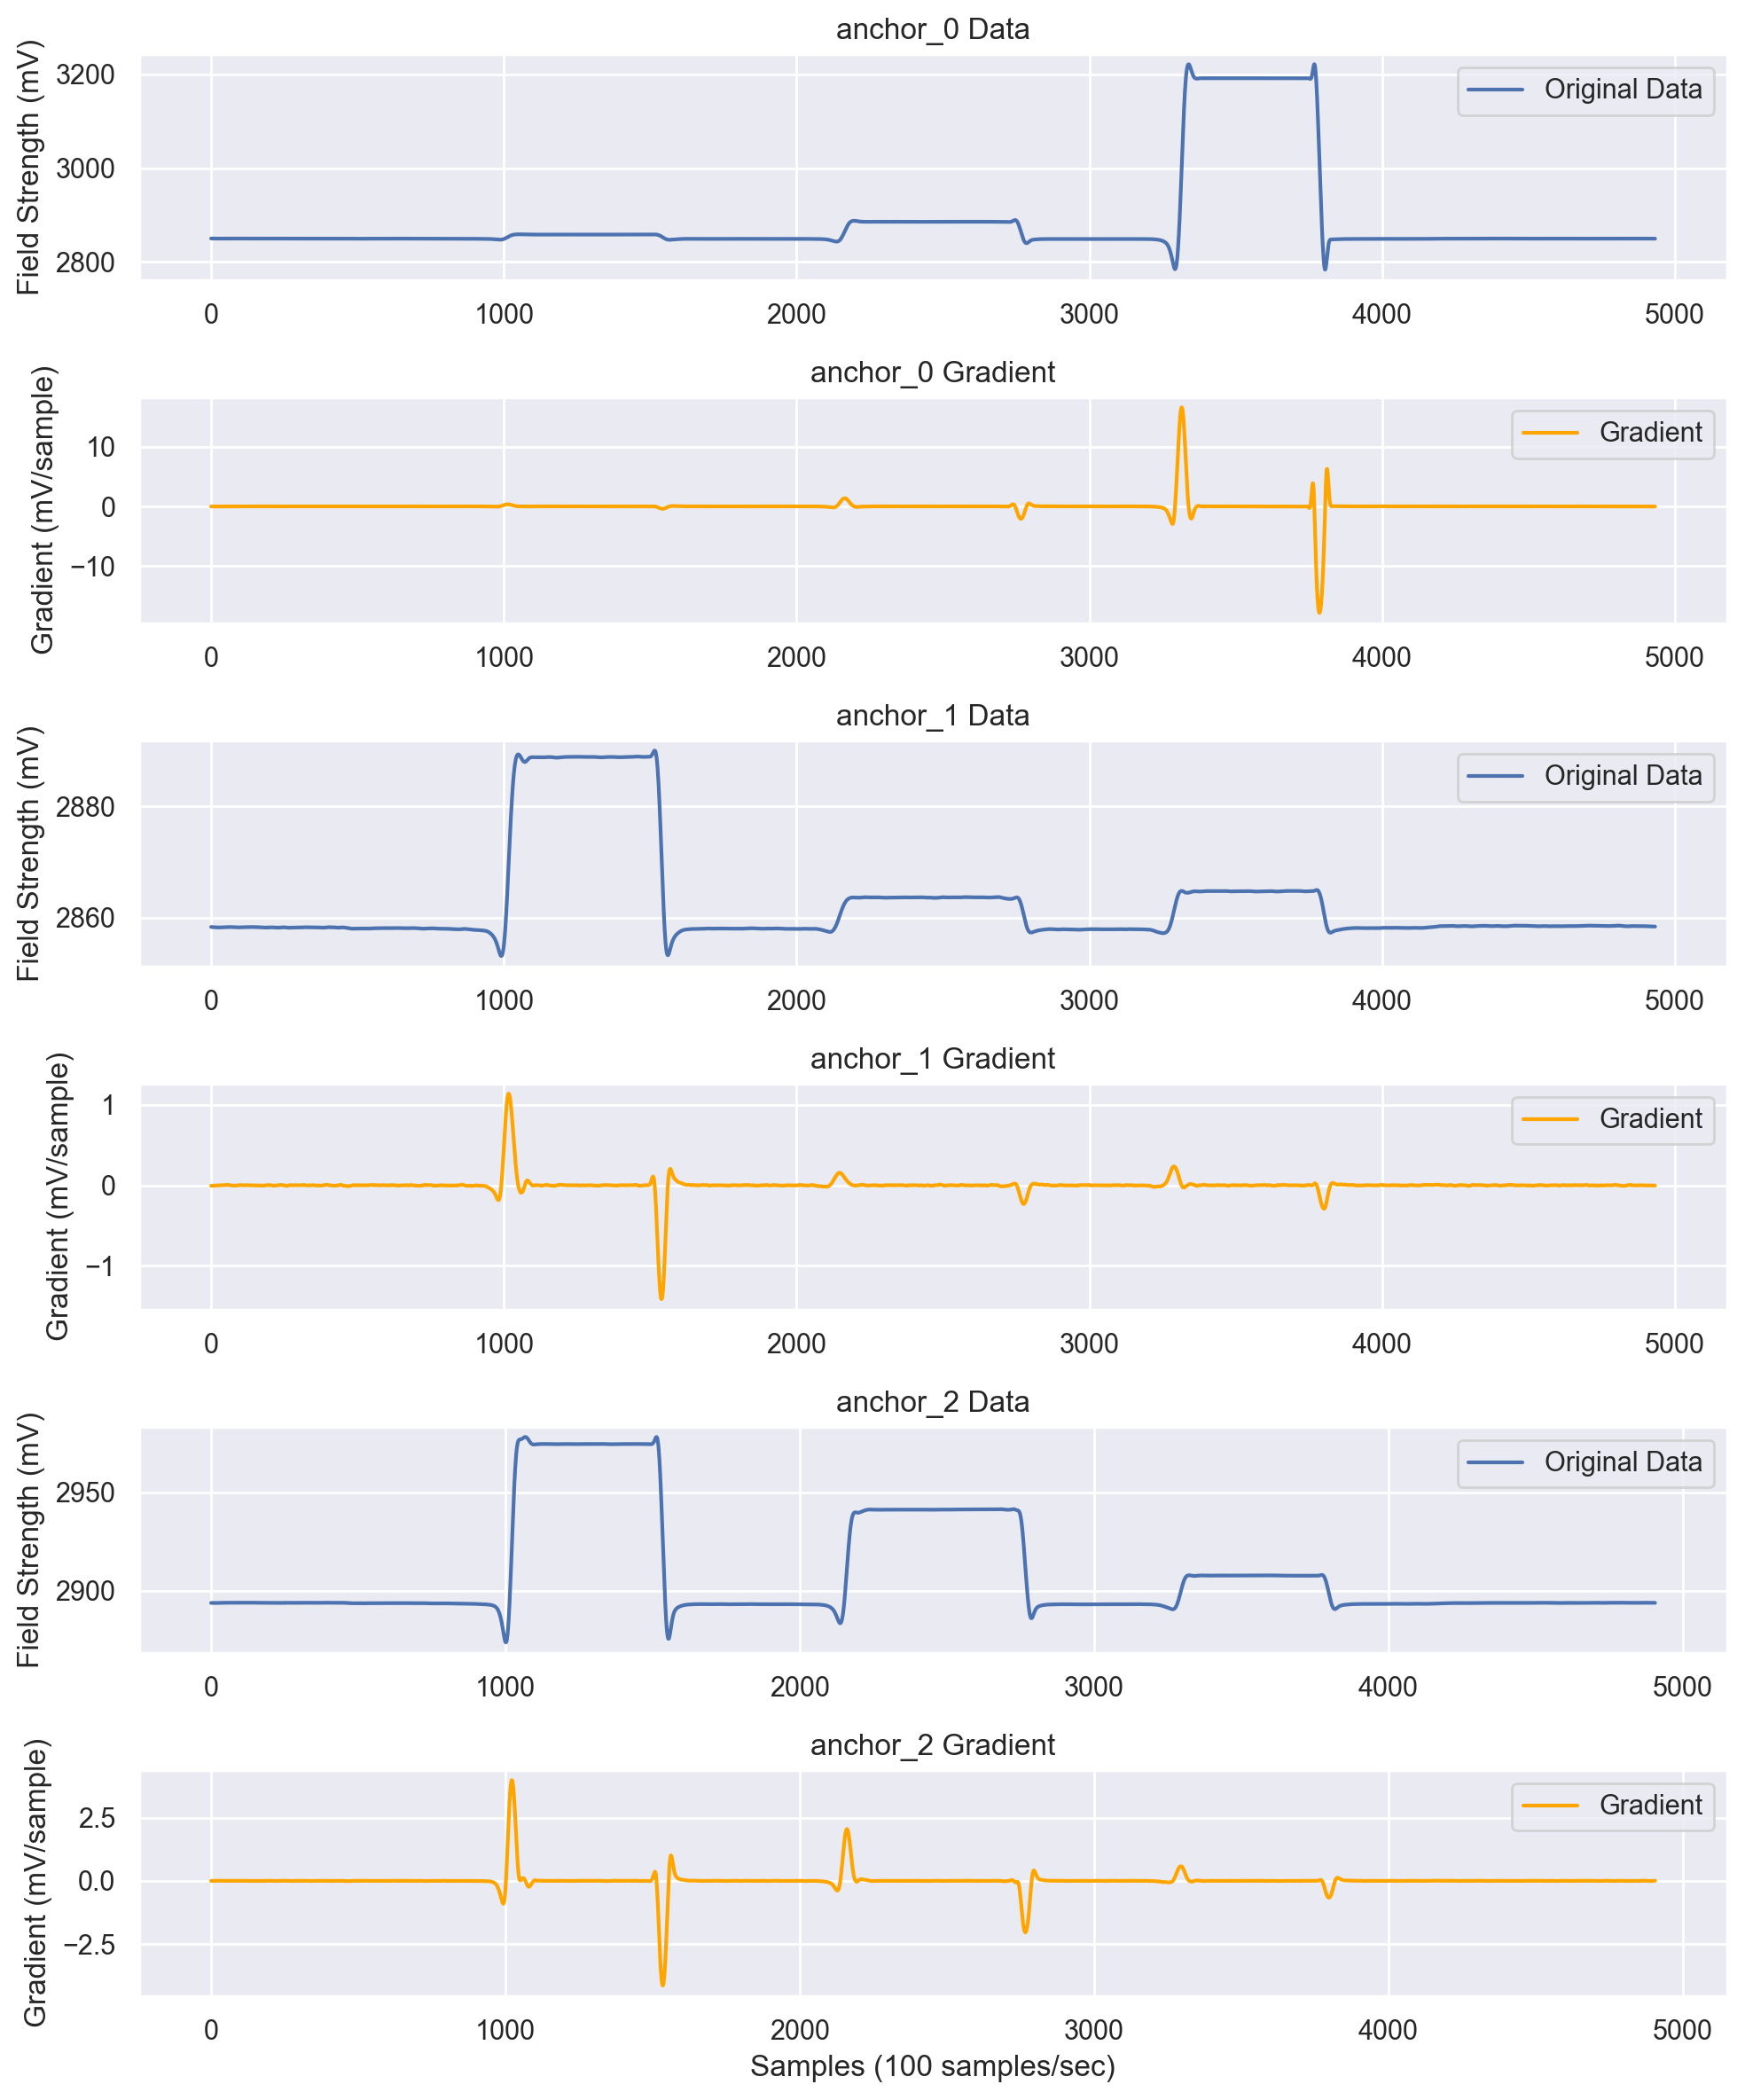

In [15]:
plot_3_channels_with_gradients(raw_df_PRM_static_PRMM_move_battery)

In [16]:
def stability_check(derivative_array, thresholds, num_chunks=5):
    
    summed_deri = np.array([])
    # aggregate the gradient sub-arrays for comparison
    for i in range(5):
        summed_deri = np.append(summed_deri, np.sum(np.abs(derivative_array[i*20: i*20 + 20])))
    # print(summed_deri)

    # compared all summed values to thresholds
    if (summed_deri[0] <= thresholds[0] and 
        summed_deri[1] <= thresholds[1] and 
        summed_deri[2] <= thresholds[2] and 
        summed_deri[3] <= thresholds[3] and 
        summed_deri[4] <= thresholds[4]):
        
        # successfully transitioned into stablized mode
        return True
    else:
        return False


In [17]:
def place_remove_detect(data_input, window_size=100, threshold_array=np.array([1.05, .95, .85, .75, .65,])):
    # Constants for the number of samples to check and the number of chunks
    num_samples = len(data_input)
    num_chunks = window_size // len(threshold_array)  # Assuming threshold_array length divides window_size
    dict = {}   

    # Initialize arrays to hold the timestamps of various events
    stability_change_stamps = []
    placement_stamps = []
    removal_stamps = []
    some_threshold = 0.7
    stability_mode = False

    # Compute the gradient and replace NaNs with zero
    gradient_values = np.nan_to_num(np.gradient(data_input))
    # Initialize a variable to track the last stable value for comparison
    last_stable_value = None

    # Loop through gradient values in windows of `window_size`
    for indx in range(0, num_samples, num_chunks):
        # print(indx)
        # Define the current window of gradient values
        current_window = gradient_values[indx:indx+window_size]

        # Check if the current window is stable
        if stability_check(current_window, threshold_array, num_chunks):

            # Record the time stamp for when the system becomes stable
            if not stability_mode:
                stability_mode = True
                stability_change_stamps.append(indx)
                dict[indx] = "UNSTABLE --> STABLE"
                # print("system goes from UNSTABLE into STABLE")

            # Check for placement or removal only if the last stable value is available
            if last_stable_value is not None:
                current_stable_value = np.mean(data_input[indx:indx+window_size])
                
                # Check if there is a significant increase (placement)
                if current_stable_value > last_stable_value + some_threshold:
                    placement_stamps.append(indx)

                # Check if there is a significant decrease (removal)
                elif current_stable_value < last_stable_value - some_threshold:
                    removal_stamps.append(indx)

            # Update the last stable value
            last_stable_value = np.mean(data_input[indx:indx+window_size])

        else:

            # Record when the system leaves stability, if it was previously stable
            if stability_mode:
                stability_mode = False
                stability_change_stamps.append(indx)
                dict[indx] = "STABLE --> UNSTABLE"
                # print("system goes from STABLE into UNSTABLE")

    
    formatter = ScalarFormatter(useOffset=False)

    # Set up subplots
    fig, axs = plt.subplots(2, 1, figsize=(10, 5), dpi=300)

     # Plot original data with placement and removal stamps
    axs[0].plot(data_input, label='Original Data')
    
    # Initialize the legend handled dictionaries
    legend_handles = {'Placement': False, 'Removal': False}

    for stamp in placement_stamps:
        axs[0].axvline(x=stamp, color='g', linestyle='--')
        if not legend_handles['Placement']:
            axs[0].axvline(x=stamp, color='g', linestyle='--', label='Placement')
            legend_handles['Placement'] = True

    for stamp in removal_stamps:
        axs[0].axvline(x=stamp, color='r', linestyle='--')
        if not legend_handles['Removal']:
            axs[0].axvline(x=stamp, color='r', linestyle='--', label='Removal')
            legend_handles['Removal'] = True

    axs[0].set_title('Original Data with Event Markers')
    axs[0].set_xlabel('Samples')
    axs[0].set_ylabel('Field Strength (mV)')
    axs[0].xaxis.set_major_formatter(formatter)
    axs[0].yaxis.set_major_formatter(formatter)
    axs[0].legend(loc="upper right", prop={'size': 6})

    # Plot channel gradient and mark peaks based on correlation
    axs[1].plot(gradient_values, label="Gradient Tracking", color="orange")

    legend_handles = {'Placement': False, 'Removal': False}

    for stamp in placement_stamps:
        axs[1].axvline(x=stamp, color='g', linestyle='--')
        if not legend_handles['Placement']:
            axs[1].axvline(x=stamp, color='g', linestyle='--', label='Placement')
            legend_handles['Placement'] = True

    for stamp in removal_stamps:
        axs[1].axvline(x=stamp, color='r', linestyle='--')
        if not legend_handles['Removal']:
            axs[1].axvline(x=stamp, color='r', linestyle='--', label='Removal')
            legend_handles['Removal'] = True

    axs[1].set_title(f'Channel Gradient')
    axs[1].set_xlabel('Samples')
    axs[1].set_ylabel('Gradient (mV/sample)')
    axs[1].xaxis.set_major_formatter(formatter)
    axs[1].yaxis.set_major_formatter(formatter)
    axs[1].legend(loc="upper right", prop={'size': 6})

    plt.tight_layout()
    plt.show()

    print(len(dict))

    return stability_change_stamps, placement_stamps, removal_stamps, dict


    
    

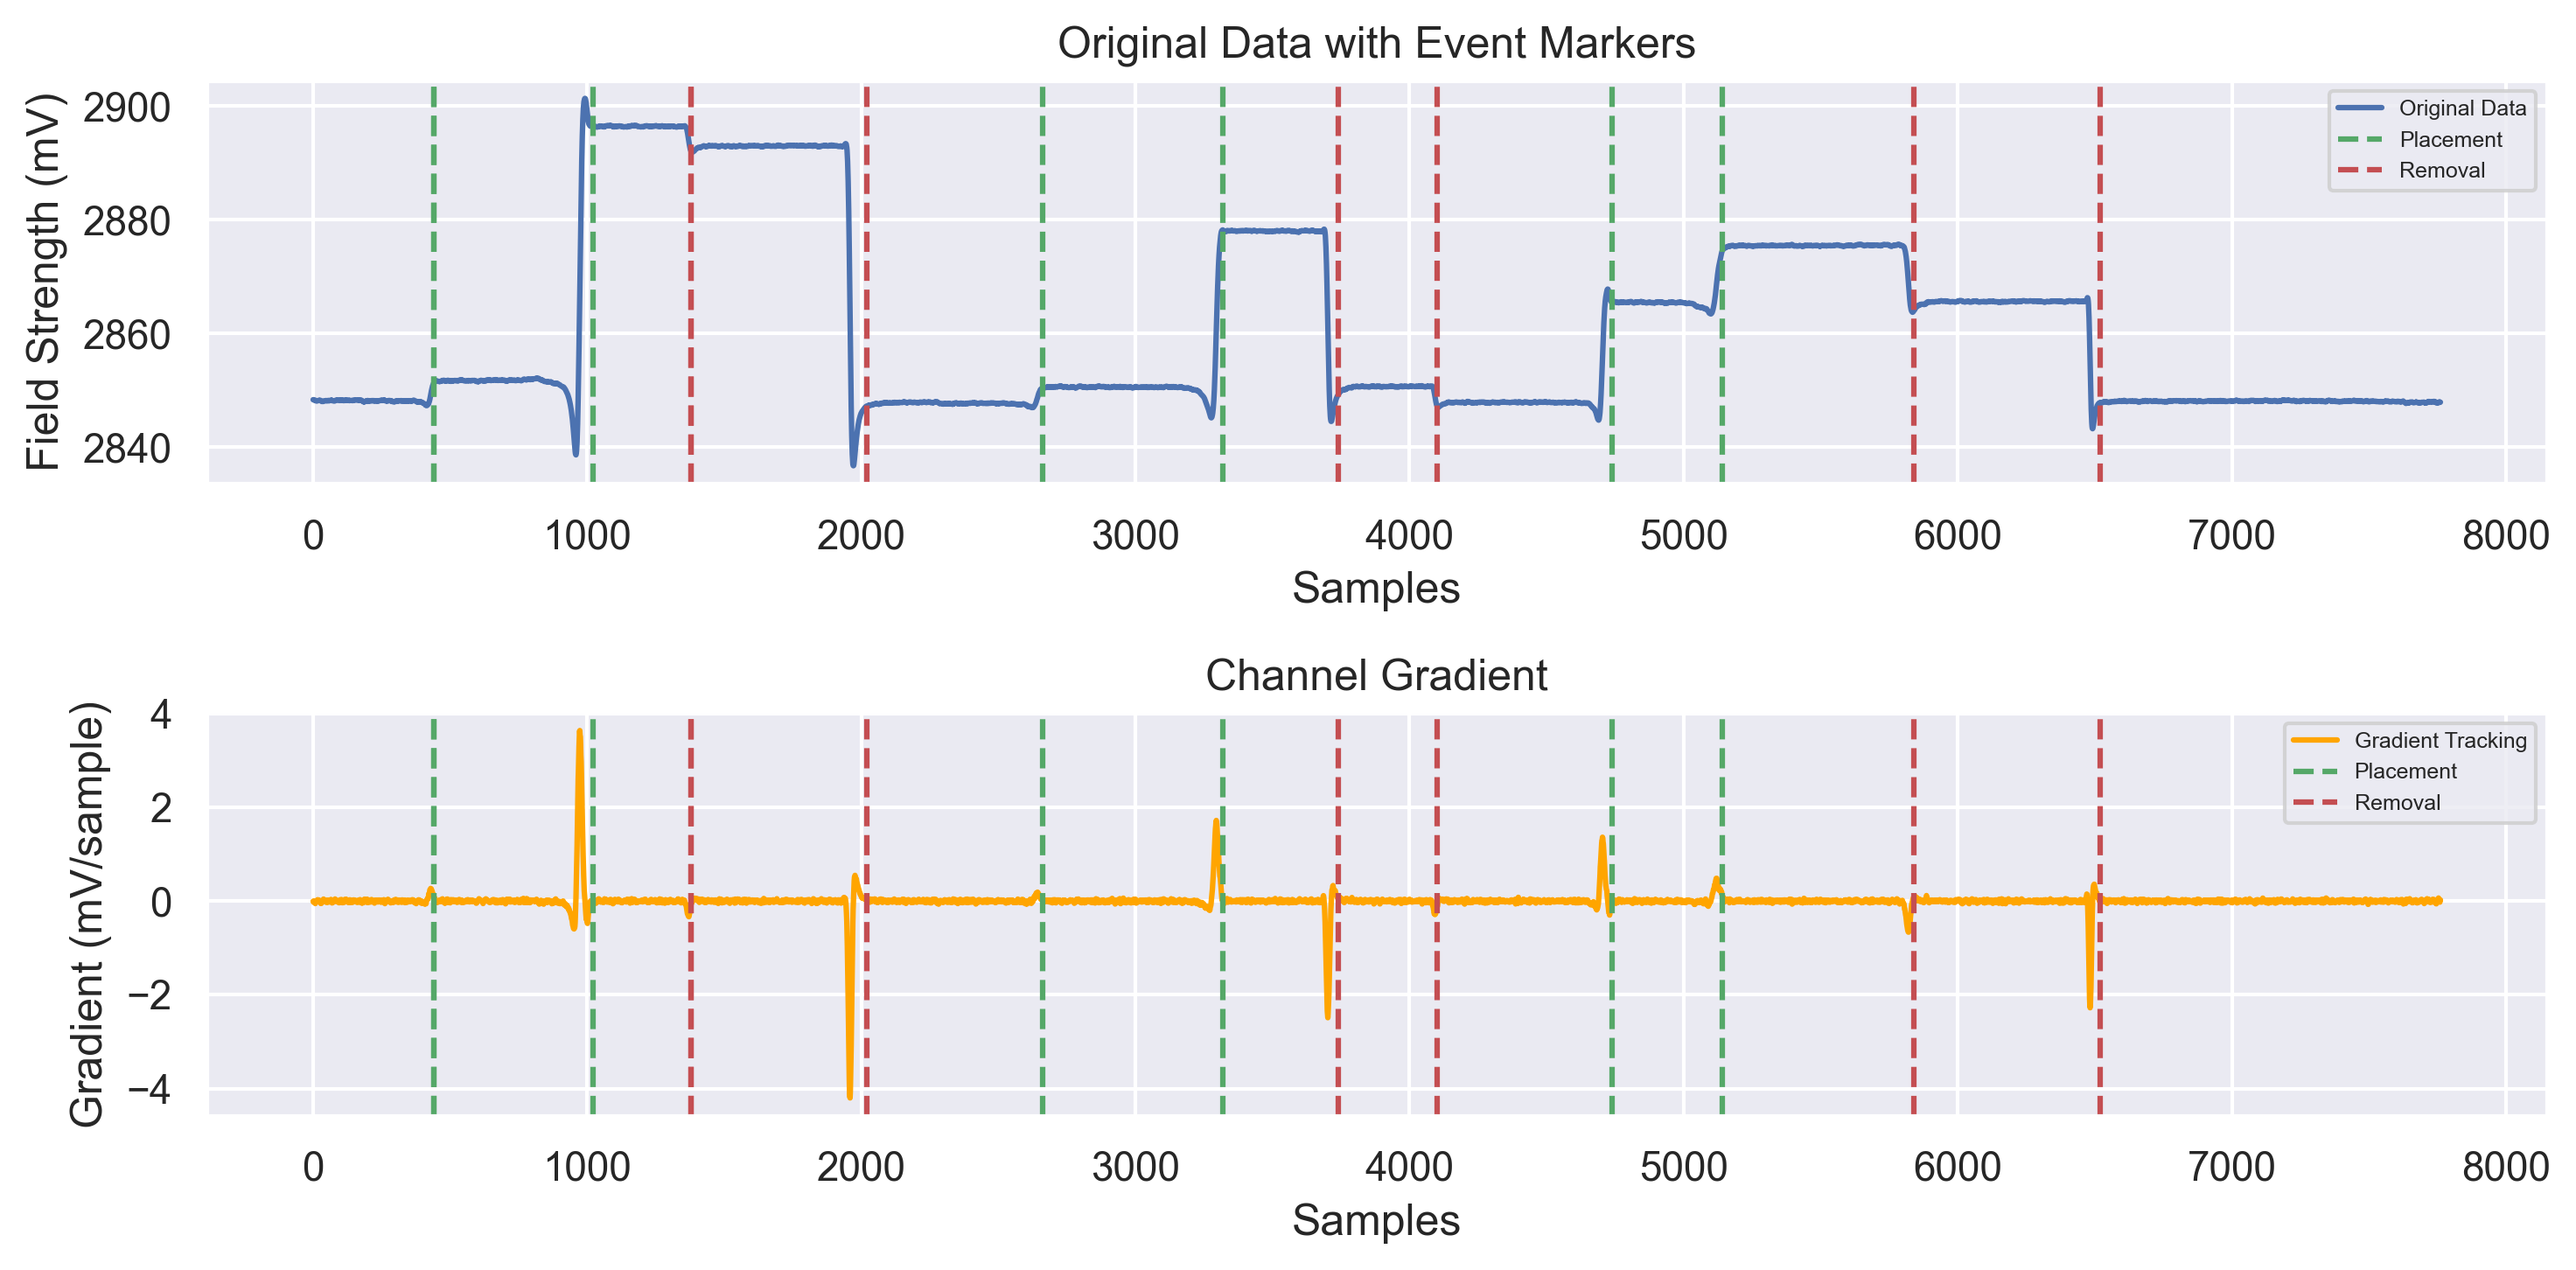

25


([0,
  320,
  440,
  820,
  1020,
  1280,
  1380,
  1860,
  2020,
  2540,
  2660,
  3140,
  3320,
  3600,
  3740,
  4000,
  4100,
  4580,
  4740,
  5000,
  5140,
  5720,
  5840,
  6380,
  6520],
 [440, 1020, 2660, 3320, 4740, 5140],
 [1380, 2020, 3740, 4100, 5840, 6520],
 {0: 'UNSTABLE --> STABLE',
  320: 'STABLE --> UNSTABLE',
  440: 'UNSTABLE --> STABLE',
  820: 'STABLE --> UNSTABLE',
  1020: 'UNSTABLE --> STABLE',
  1280: 'STABLE --> UNSTABLE',
  1380: 'UNSTABLE --> STABLE',
  1860: 'STABLE --> UNSTABLE',
  2020: 'UNSTABLE --> STABLE',
  2540: 'STABLE --> UNSTABLE',
  2660: 'UNSTABLE --> STABLE',
  3140: 'STABLE --> UNSTABLE',
  3320: 'UNSTABLE --> STABLE',
  3600: 'STABLE --> UNSTABLE',
  3740: 'UNSTABLE --> STABLE',
  4000: 'STABLE --> UNSTABLE',
  4100: 'UNSTABLE --> STABLE',
  4580: 'STABLE --> UNSTABLE',
  4740: 'UNSTABLE --> STABLE',
  5000: 'STABLE --> UNSTABLE',
  5140: 'UNSTABLE --> STABLE',
  5720: 'STABLE --> UNSTABLE',
  5840: 'UNSTABLE --> STABLE',
  6380: 'STABLE --> U

In [18]:
place_remove_detect(raw_df_PRM_PRMM_place_remove_3_times["anchor_0"])

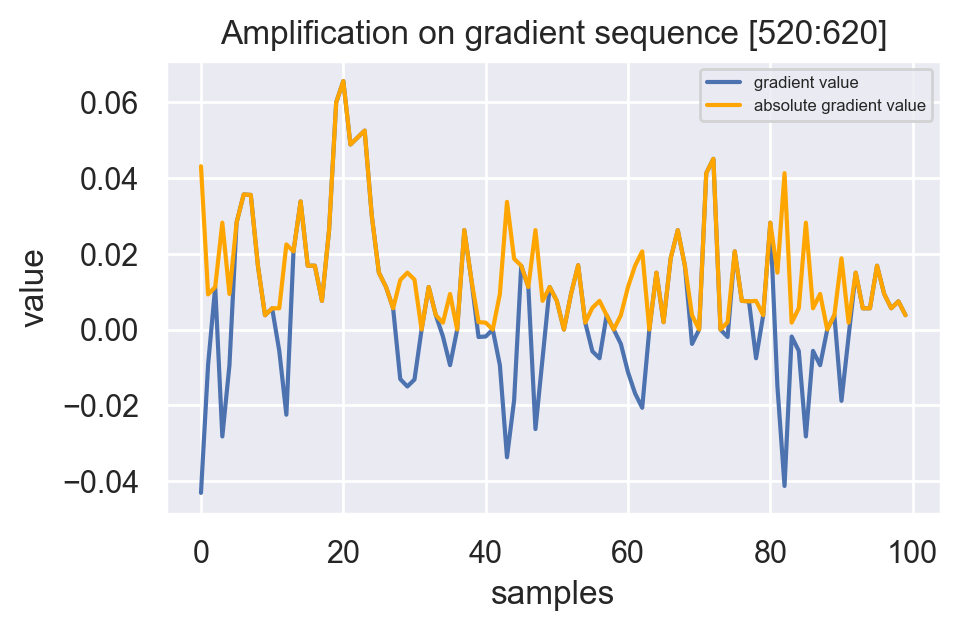

In [19]:
first_derivative = np.gradient(raw_df_PRM_laptop_battery_multiple_bottle_sensor_height_3_magnet_height_0cm["anchor_0"])
interest_interval = first_derivative[520: 620]
plt.figure(figsize=(5, 3), dpi=200)
plt.plot(interest_interval, label="gradient value",)
plt.xlabel("samples")
plt.ylabel("value")
plt.title("Amplification on gradient sequence [520:620]")
abs_interest_interval = abs(interest_interval)
plt.plot(abs_interest_interval, label="absolute gradient value", color="orange")
plt.legend(loc="upper right", prop={'size': 6})


In [20]:
summed_interval = [sum(abs_interest_interval[0:20]), sum(abs_interest_interval[21:40]), sum(abs_interest_interval[41:60]), sum(abs_interest_interval[61:80]), sum(abs_interest_interval[81:])]

In [21]:
summed_interval

[0.436768499999971,
 0.322631999999885,
 0.19152600000006714,
 0.25537249999956657,
 0.20068349999996826]

Text(0.5, 1.0, 'Stability Check Process at the Moment of 520 Samples')

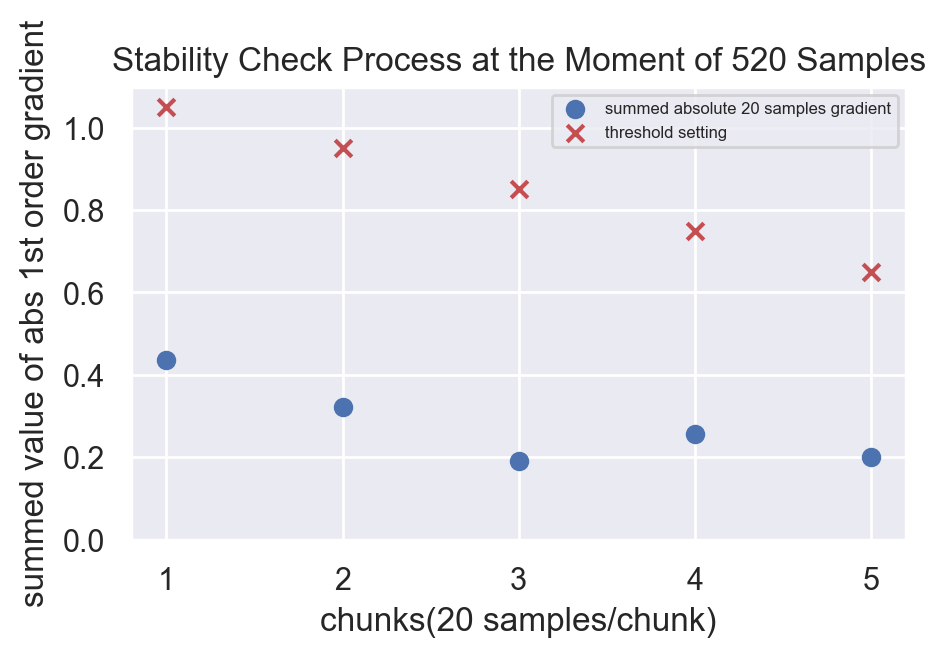

In [22]:
plt.figure(figsize=(5, 3), dpi=200)
plt.scatter(np.linspace(1, 5, 5), summed_interval, label="summed absolute 20 samples gradient")
plt.ylim(0, 1.1)
plt.scatter(np.linspace(1, 5, 5), np.array([1.05, .95, .85, .75, .65,]), marker="x", color="r", label="threshold setting")
plt.legend(loc="upper right", prop={'size': 6})
plt.xlabel("chunks(20 samples/chunk)")
plt.ylabel("summed value of abs 1st order gradient")
plt.title("Stability Check Process at the Moment of 520 Samples")

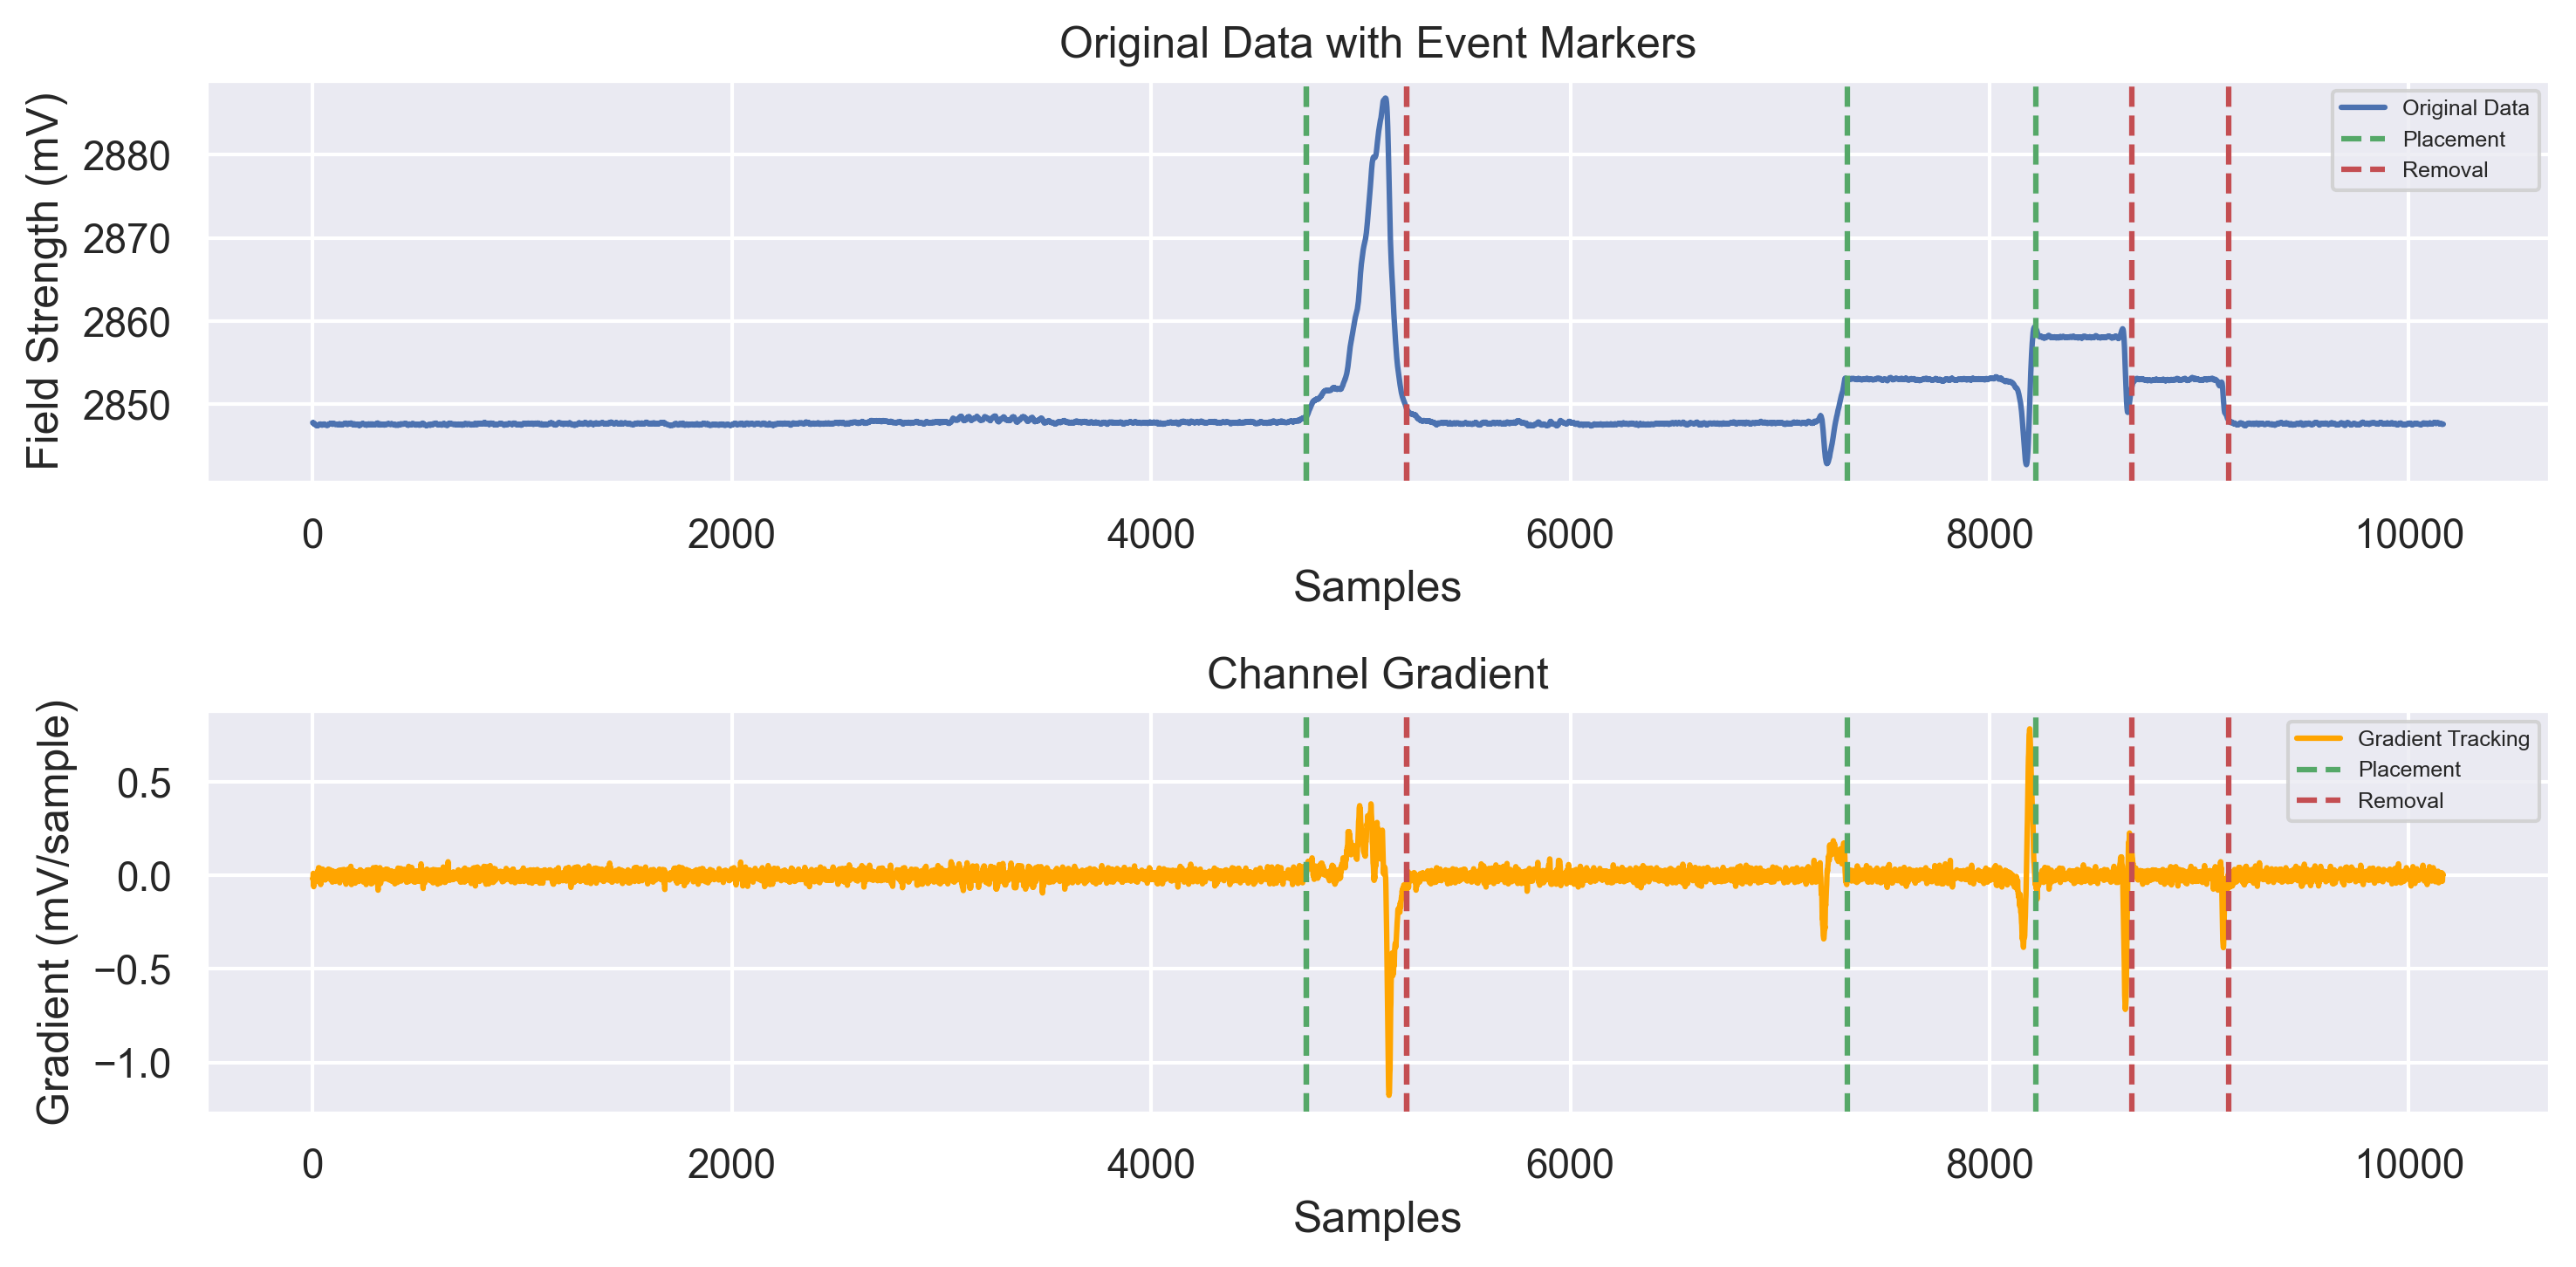

25


([0,
  3040,
  3060,
  3180,
  3220,
  3260,
  3280,
  3400,
  3420,
  4660,
  4740,
  4820,
  5220,
  5820,
  5840,
  5860,
  5880,
  7100,
  7320,
  8040,
  8220,
  8540,
  8680,
  9000,
  9140],
 [4740, 7320, 8220],
 [5220, 8680, 9140],
 {0: 'UNSTABLE --> STABLE',
  3040: 'STABLE --> UNSTABLE',
  3060: 'UNSTABLE --> STABLE',
  3180: 'STABLE --> UNSTABLE',
  3220: 'UNSTABLE --> STABLE',
  3260: 'STABLE --> UNSTABLE',
  3280: 'UNSTABLE --> STABLE',
  3400: 'STABLE --> UNSTABLE',
  3420: 'UNSTABLE --> STABLE',
  4660: 'STABLE --> UNSTABLE',
  4740: 'UNSTABLE --> STABLE',
  4820: 'STABLE --> UNSTABLE',
  5220: 'UNSTABLE --> STABLE',
  5820: 'STABLE --> UNSTABLE',
  5840: 'UNSTABLE --> STABLE',
  5860: 'STABLE --> UNSTABLE',
  5880: 'UNSTABLE --> STABLE',
  7100: 'STABLE --> UNSTABLE',
  7320: 'UNSTABLE --> STABLE',
  8040: 'STABLE --> UNSTABLE',
  8220: 'UNSTABLE --> STABLE',
  8540: 'STABLE --> UNSTABLE',
  8680: 'UNSTABLE --> STABLE',
  9000: 'STABLE --> UNSTABLE',
  9140: 'UNSTABLE -

In [23]:
place_remove_detect(raw_df_PRM_PRM_place_remove_remove_place["anchor_0"])

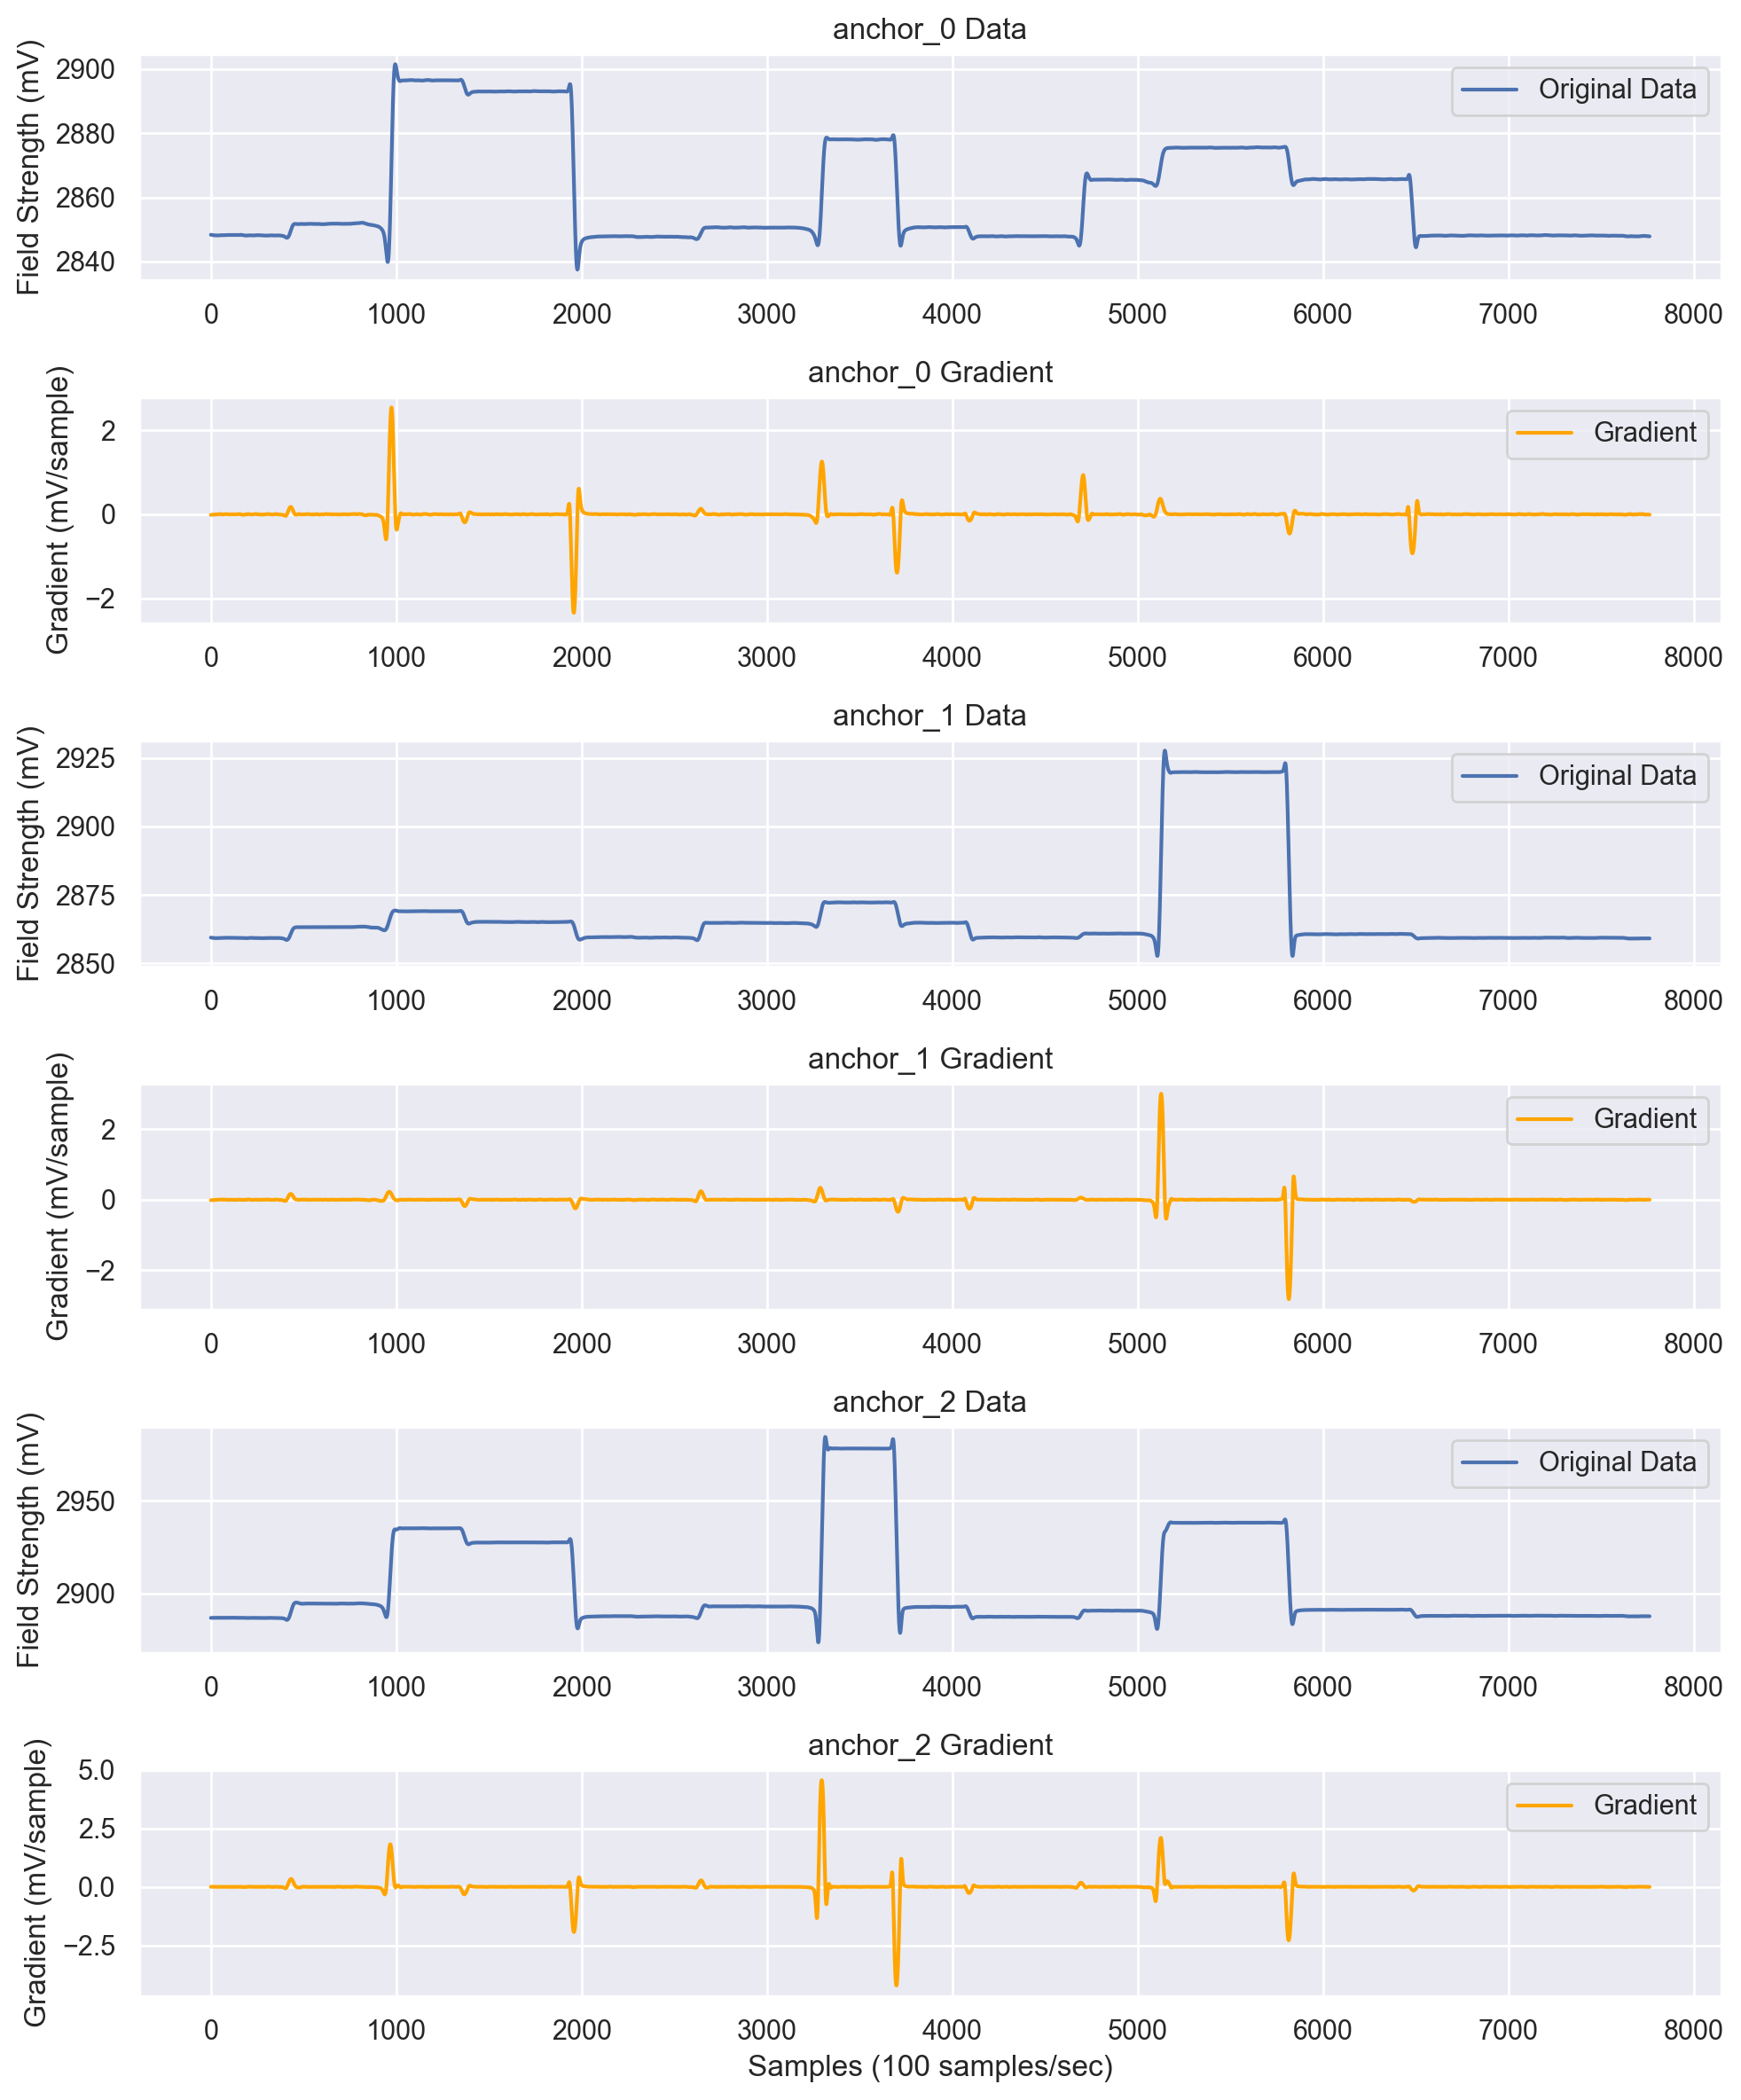

In [24]:
plot_3_channels_with_gradients(raw_df=raw_df_PRM_PRMM_place_remove_3_times)

## visualisation
* the placement and removal are somewhat symmetric on graph
* before and after the placement and removal, the reading will go below the actual environment val
* the real action could be regarded as a __Huge Steady Gradient Change__, (both up and down)


## possible methods
* dynamic time warping: matching similar patterns
* template matching: cross-correlation
* derivative analysis: pin point the interested sequence where steady occurence of __positive derivatives surrounded by negative derivative__

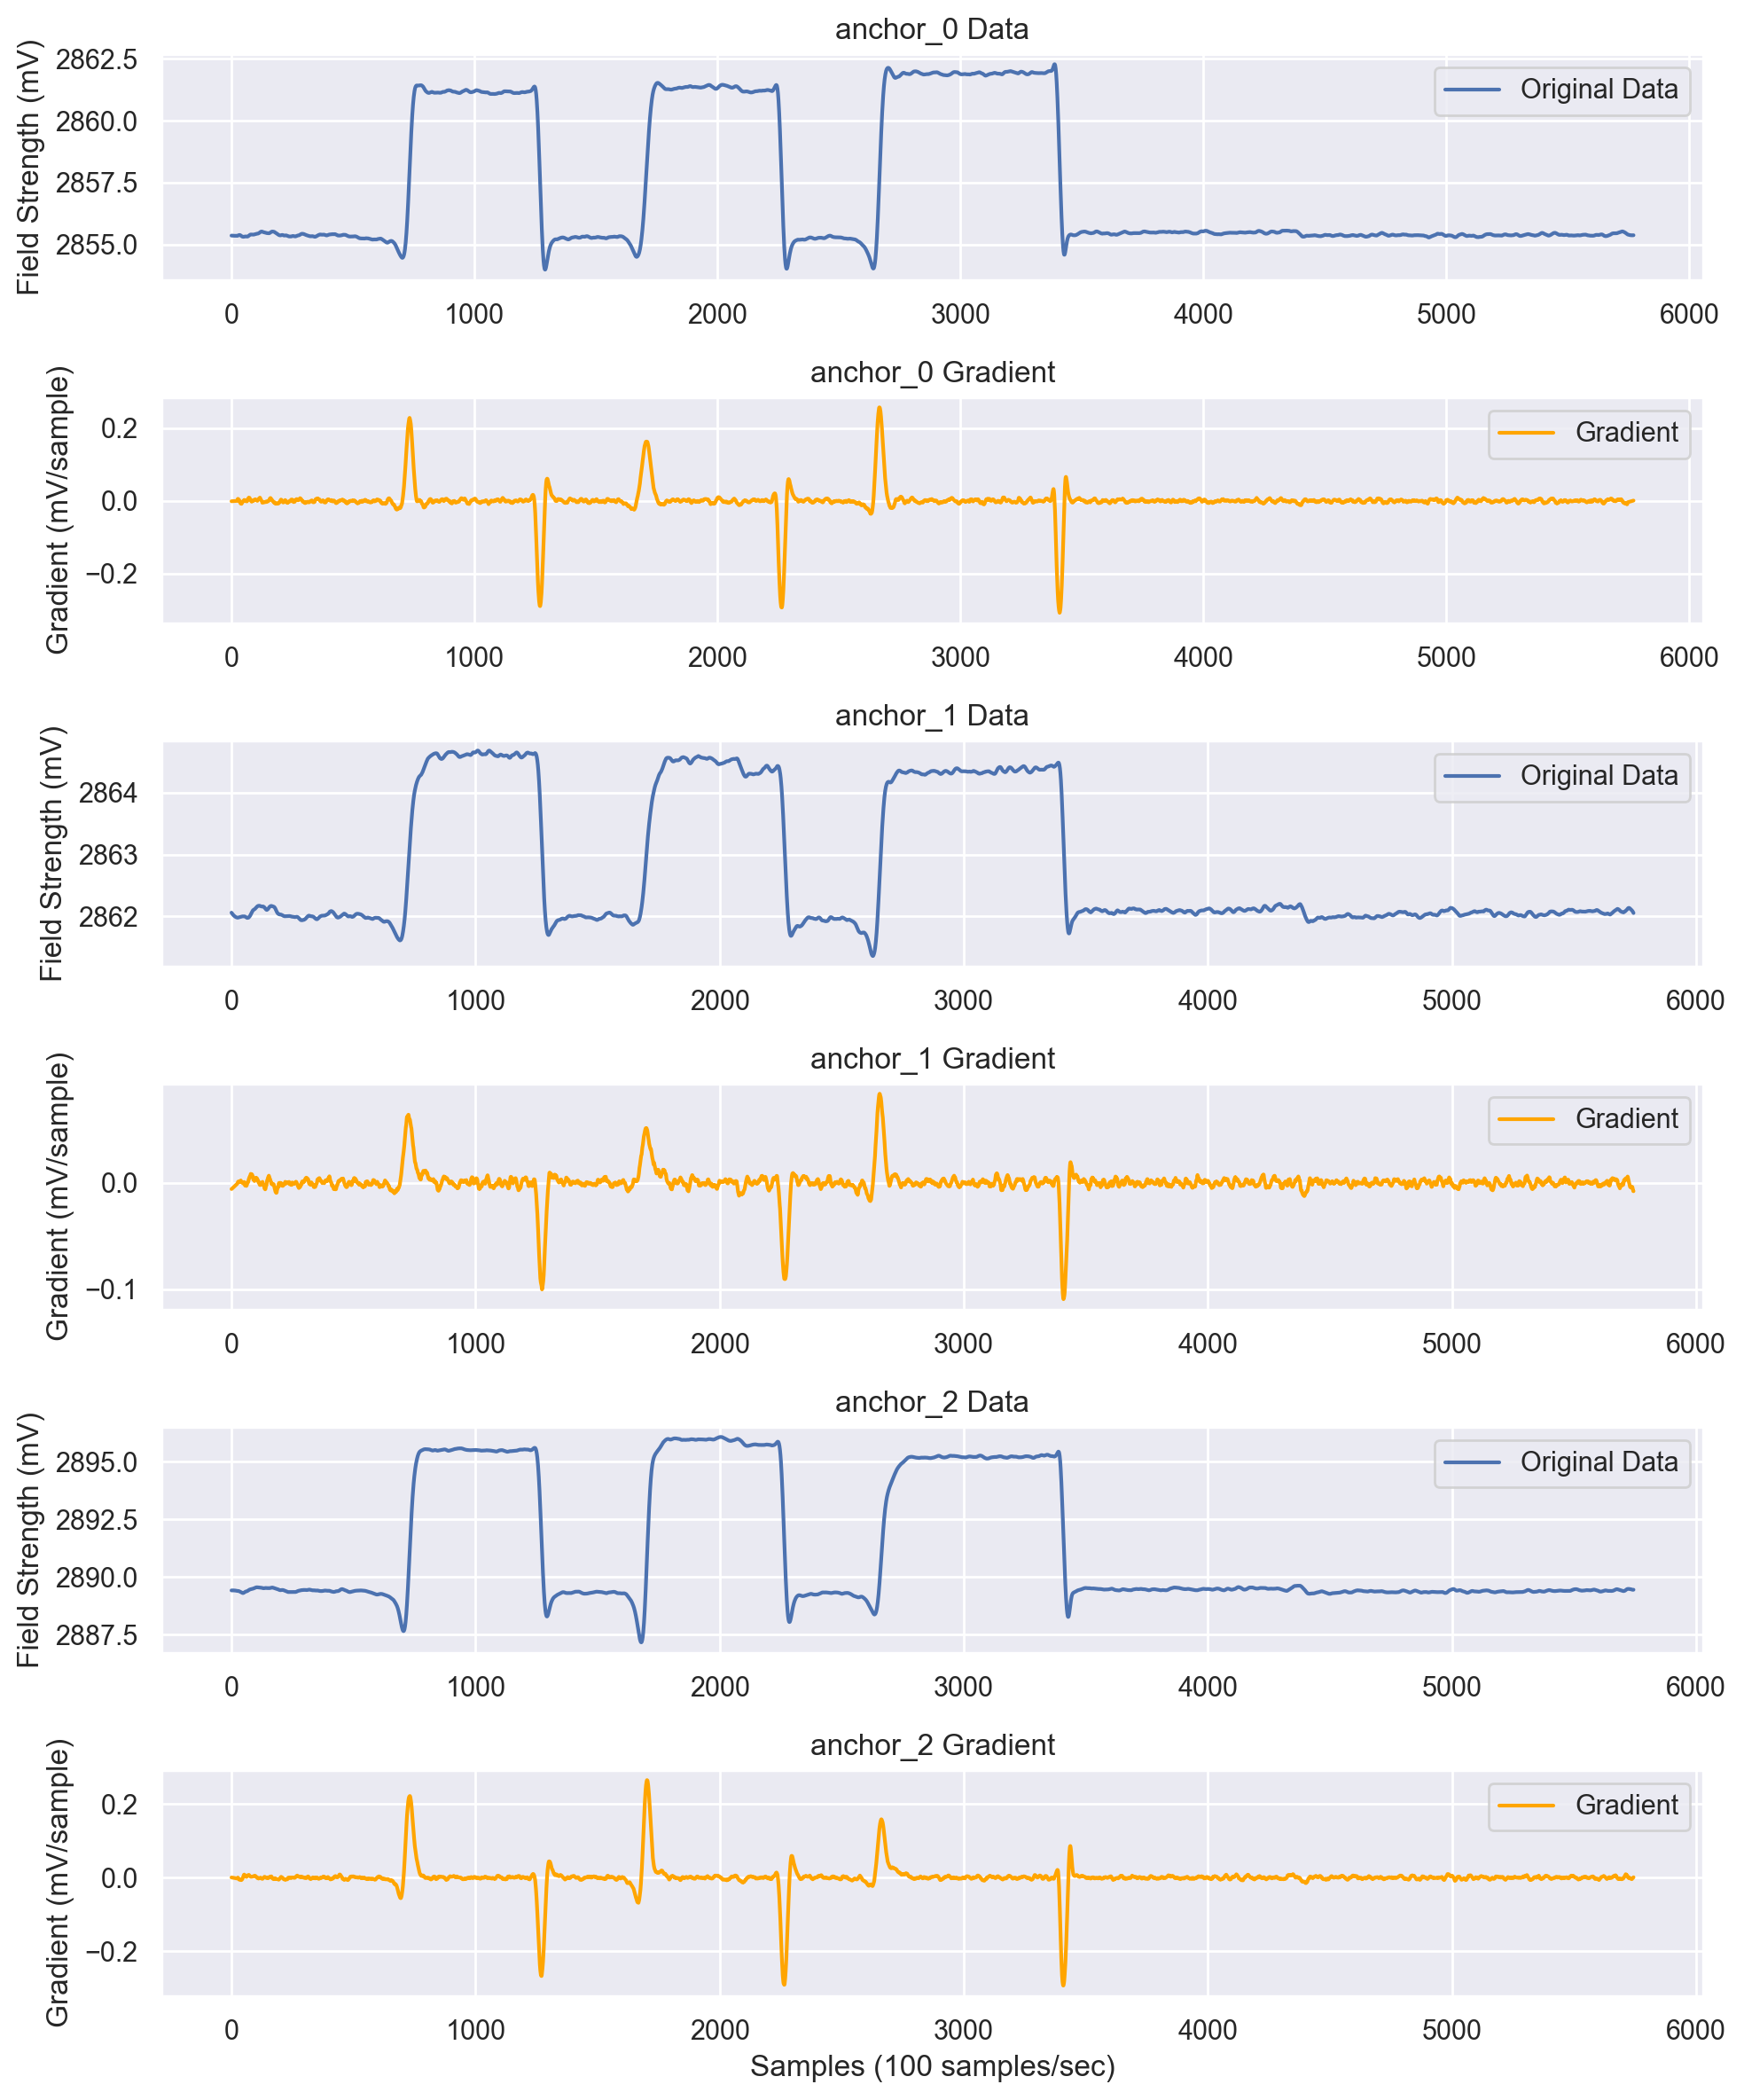

In [25]:
plot_3_channels_with_gradients(raw_df_PRM_laptop_battery_multiple_bottle_height_3)

In [26]:
raw_df_b1b3_place_remove_5_anchors = pd.read_csv("./data/feb-27-5-anchor-b1-place-b3-place-b1-remove-b3-remove-known-position.txt", names=["anchor_0", "anchor_1", "anchor_2", "anchor_3", "anchor_4"])

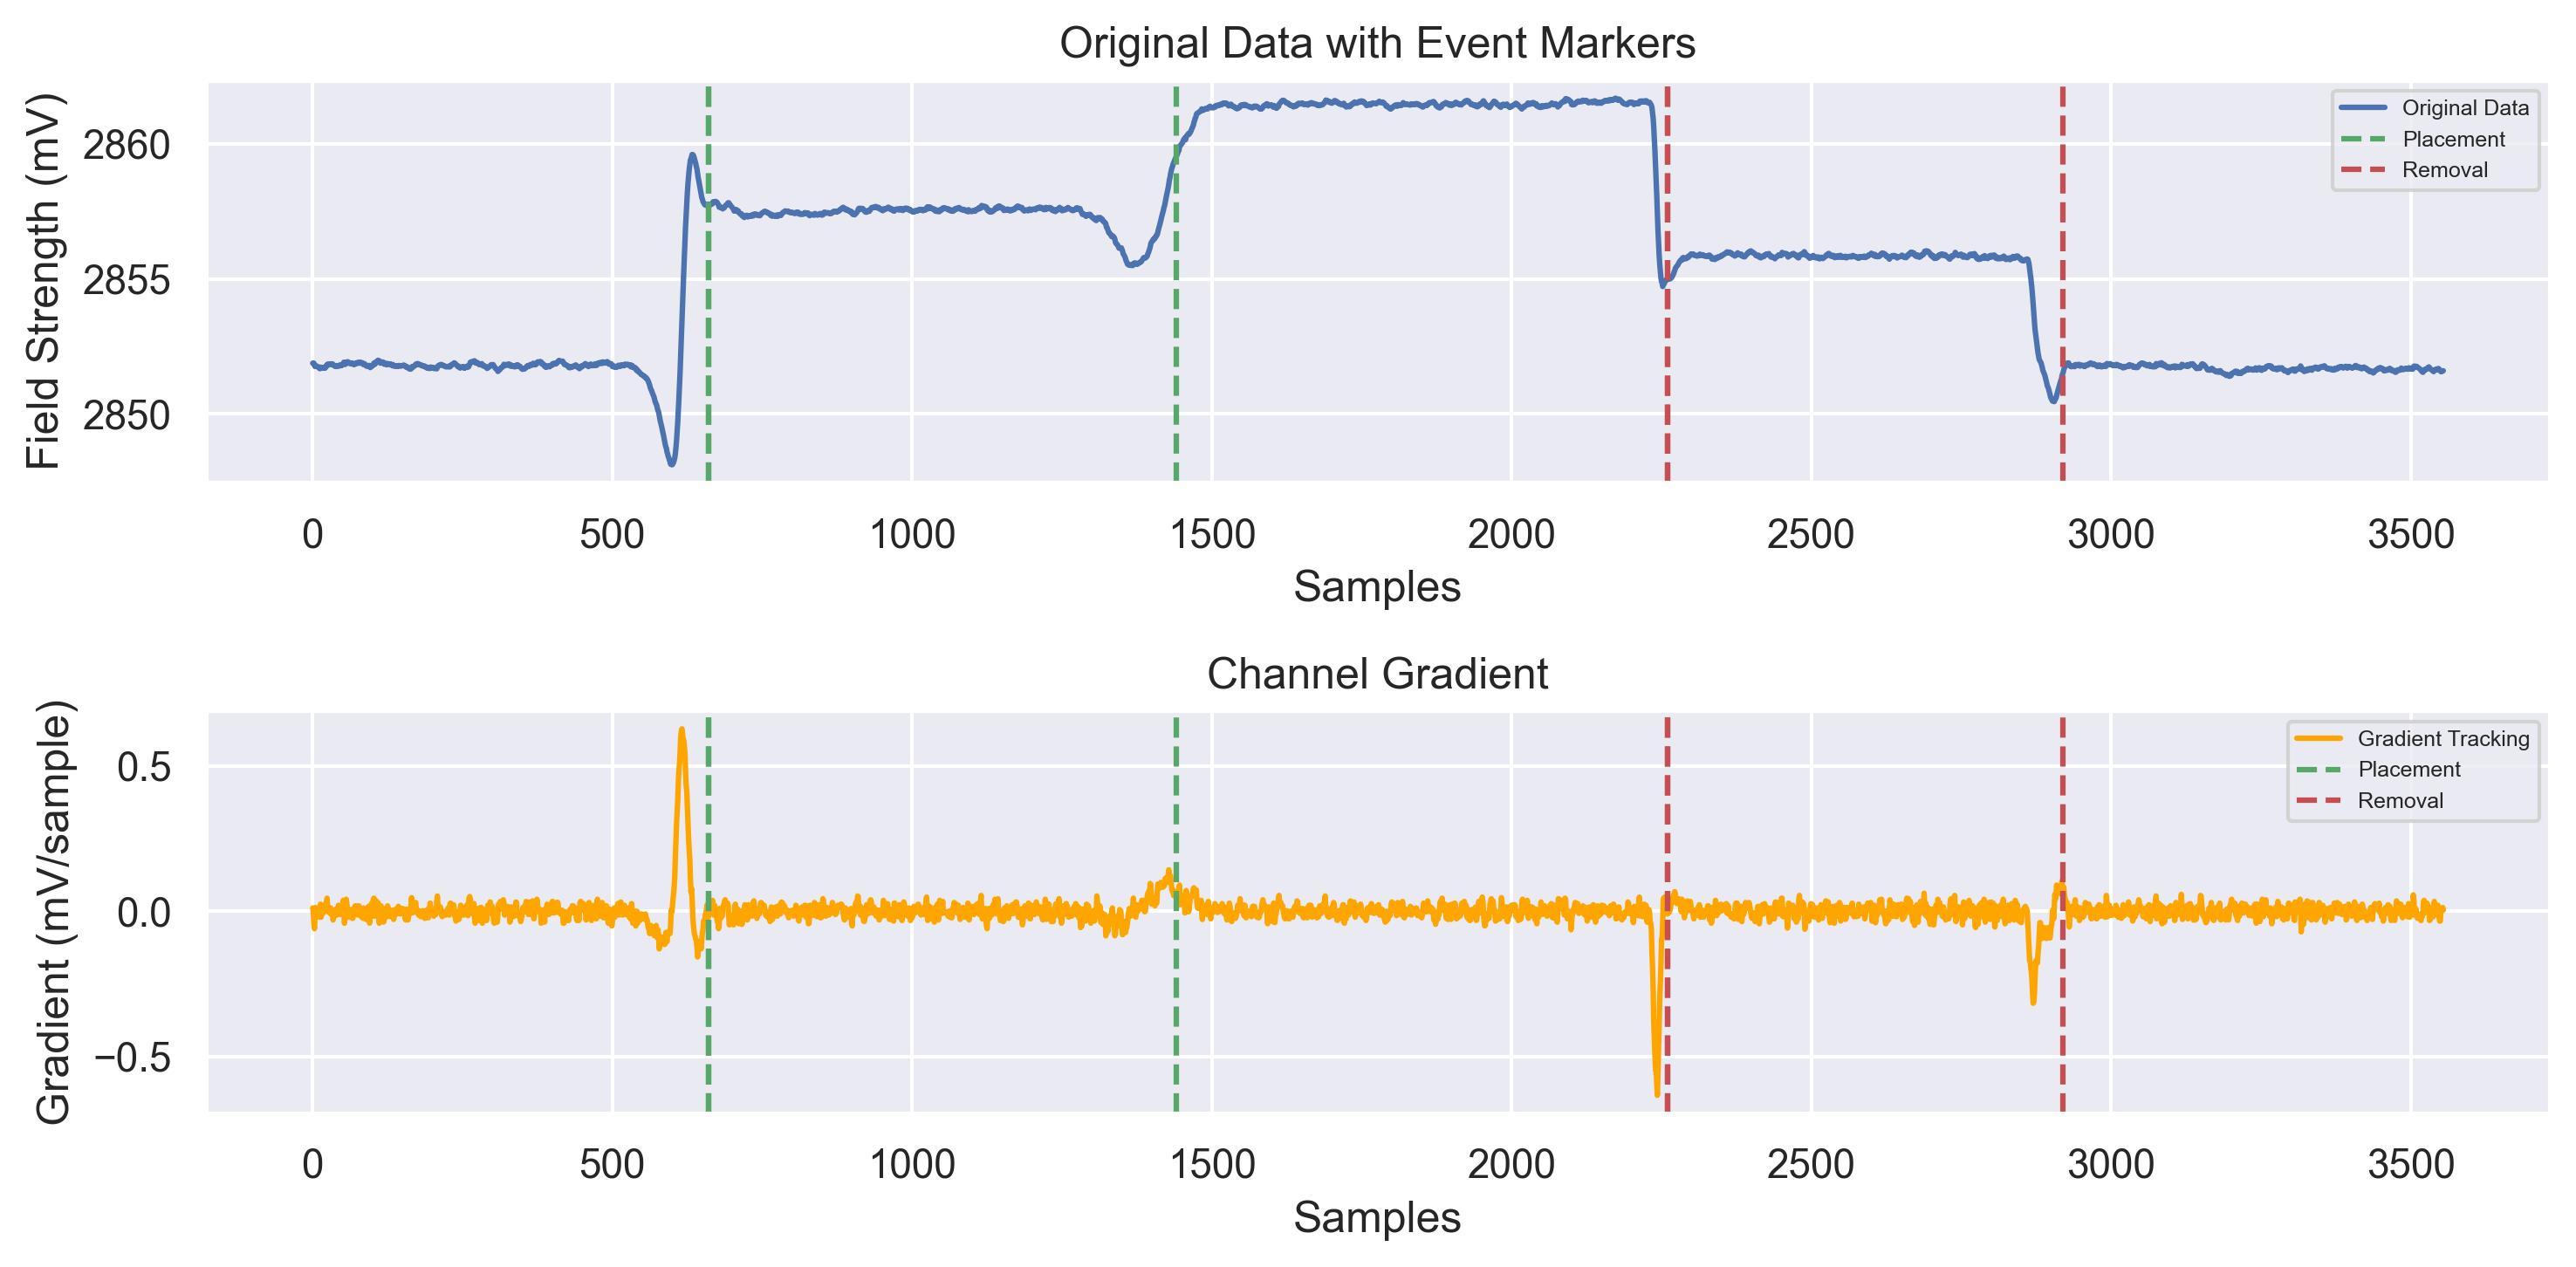

9


([0, 480, 660, 1240, 1440, 2140, 2260, 2780, 2920],
 [660, 1440],
 [2260, 2920],
 {0: 'UNSTABLE --> STABLE',
  480: 'STABLE --> UNSTABLE',
  660: 'UNSTABLE --> STABLE',
  1240: 'STABLE --> UNSTABLE',
  1440: 'UNSTABLE --> STABLE',
  2140: 'STABLE --> UNSTABLE',
  2260: 'UNSTABLE --> STABLE',
  2780: 'STABLE --> UNSTABLE',
  2920: 'UNSTABLE --> STABLE'})

In [27]:
place_remove_detect(raw_df_b1b3_place_remove_5_anchors["anchor_0"])

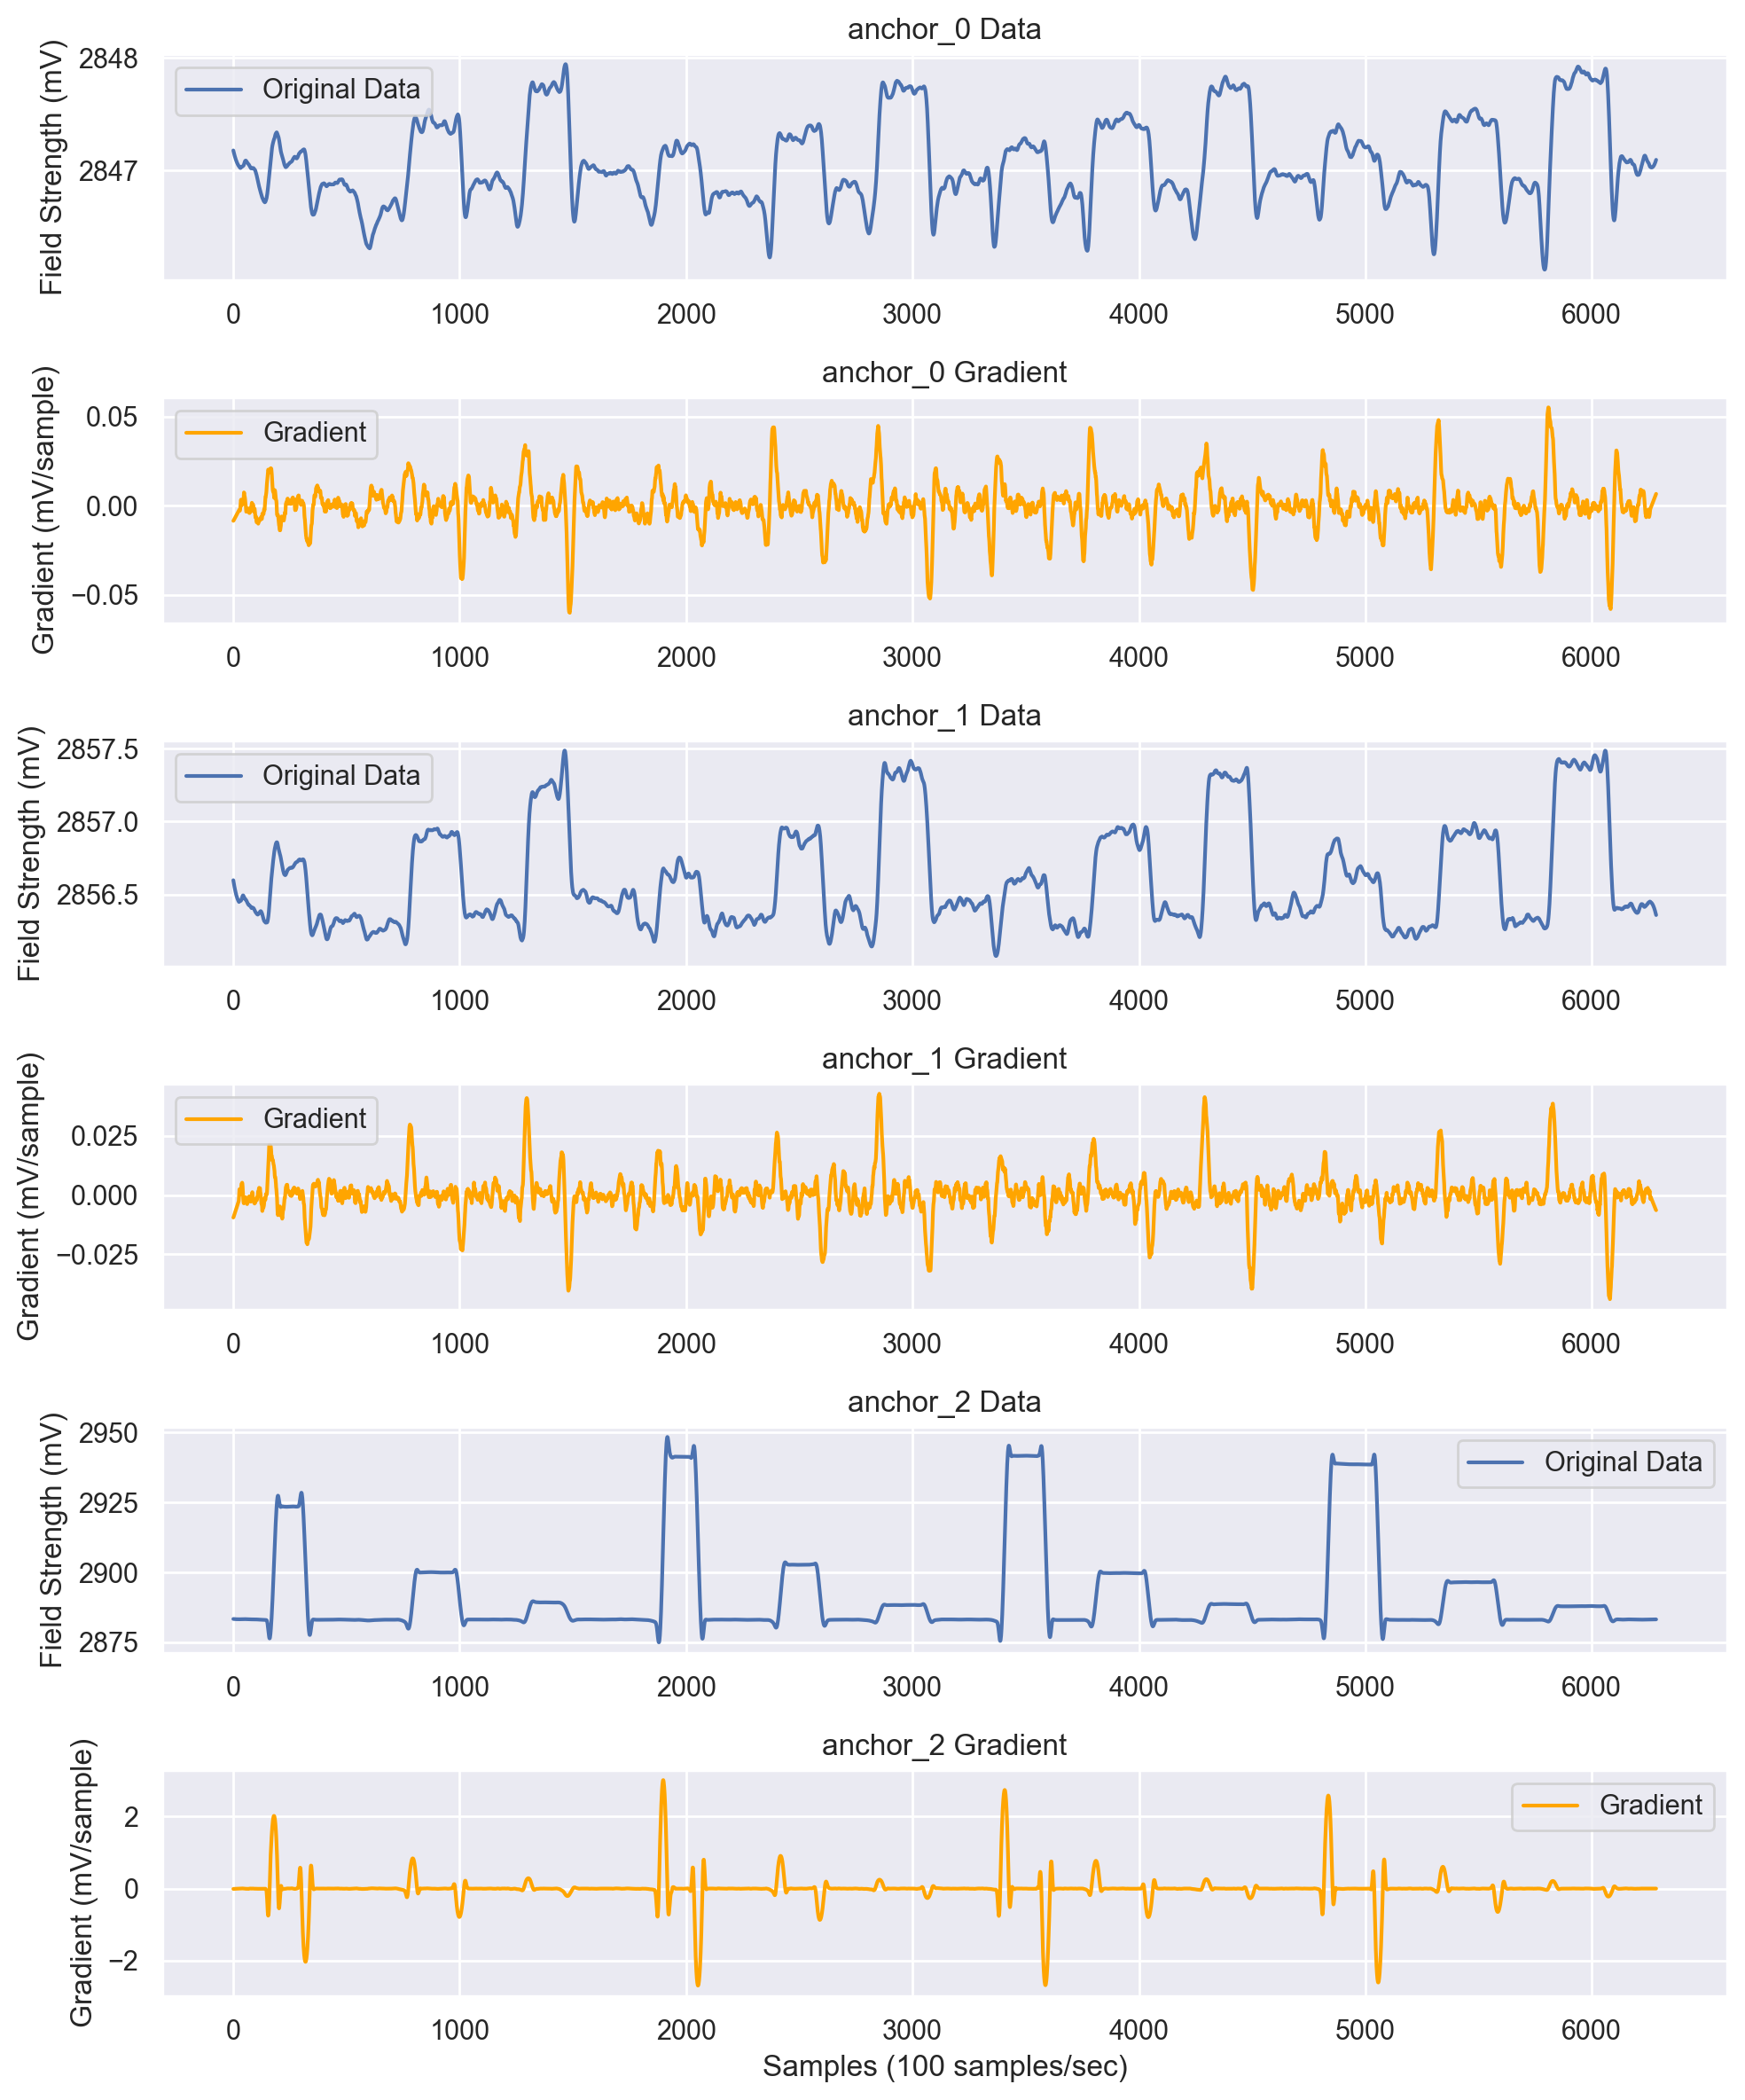

In [28]:
raw_df_anchor2_prlm_place_diff_distance = pd.read_csv("./data/mar-20-prlm-place-at-different-distance-anchor-2.txt", names=["anchor_0", "anchor_1", "anchor_2", "anchor_3", "anchor_4"])
plot_3_channels_with_gradients(raw_df=raw_df_anchor2_prlm_place_diff_distance)

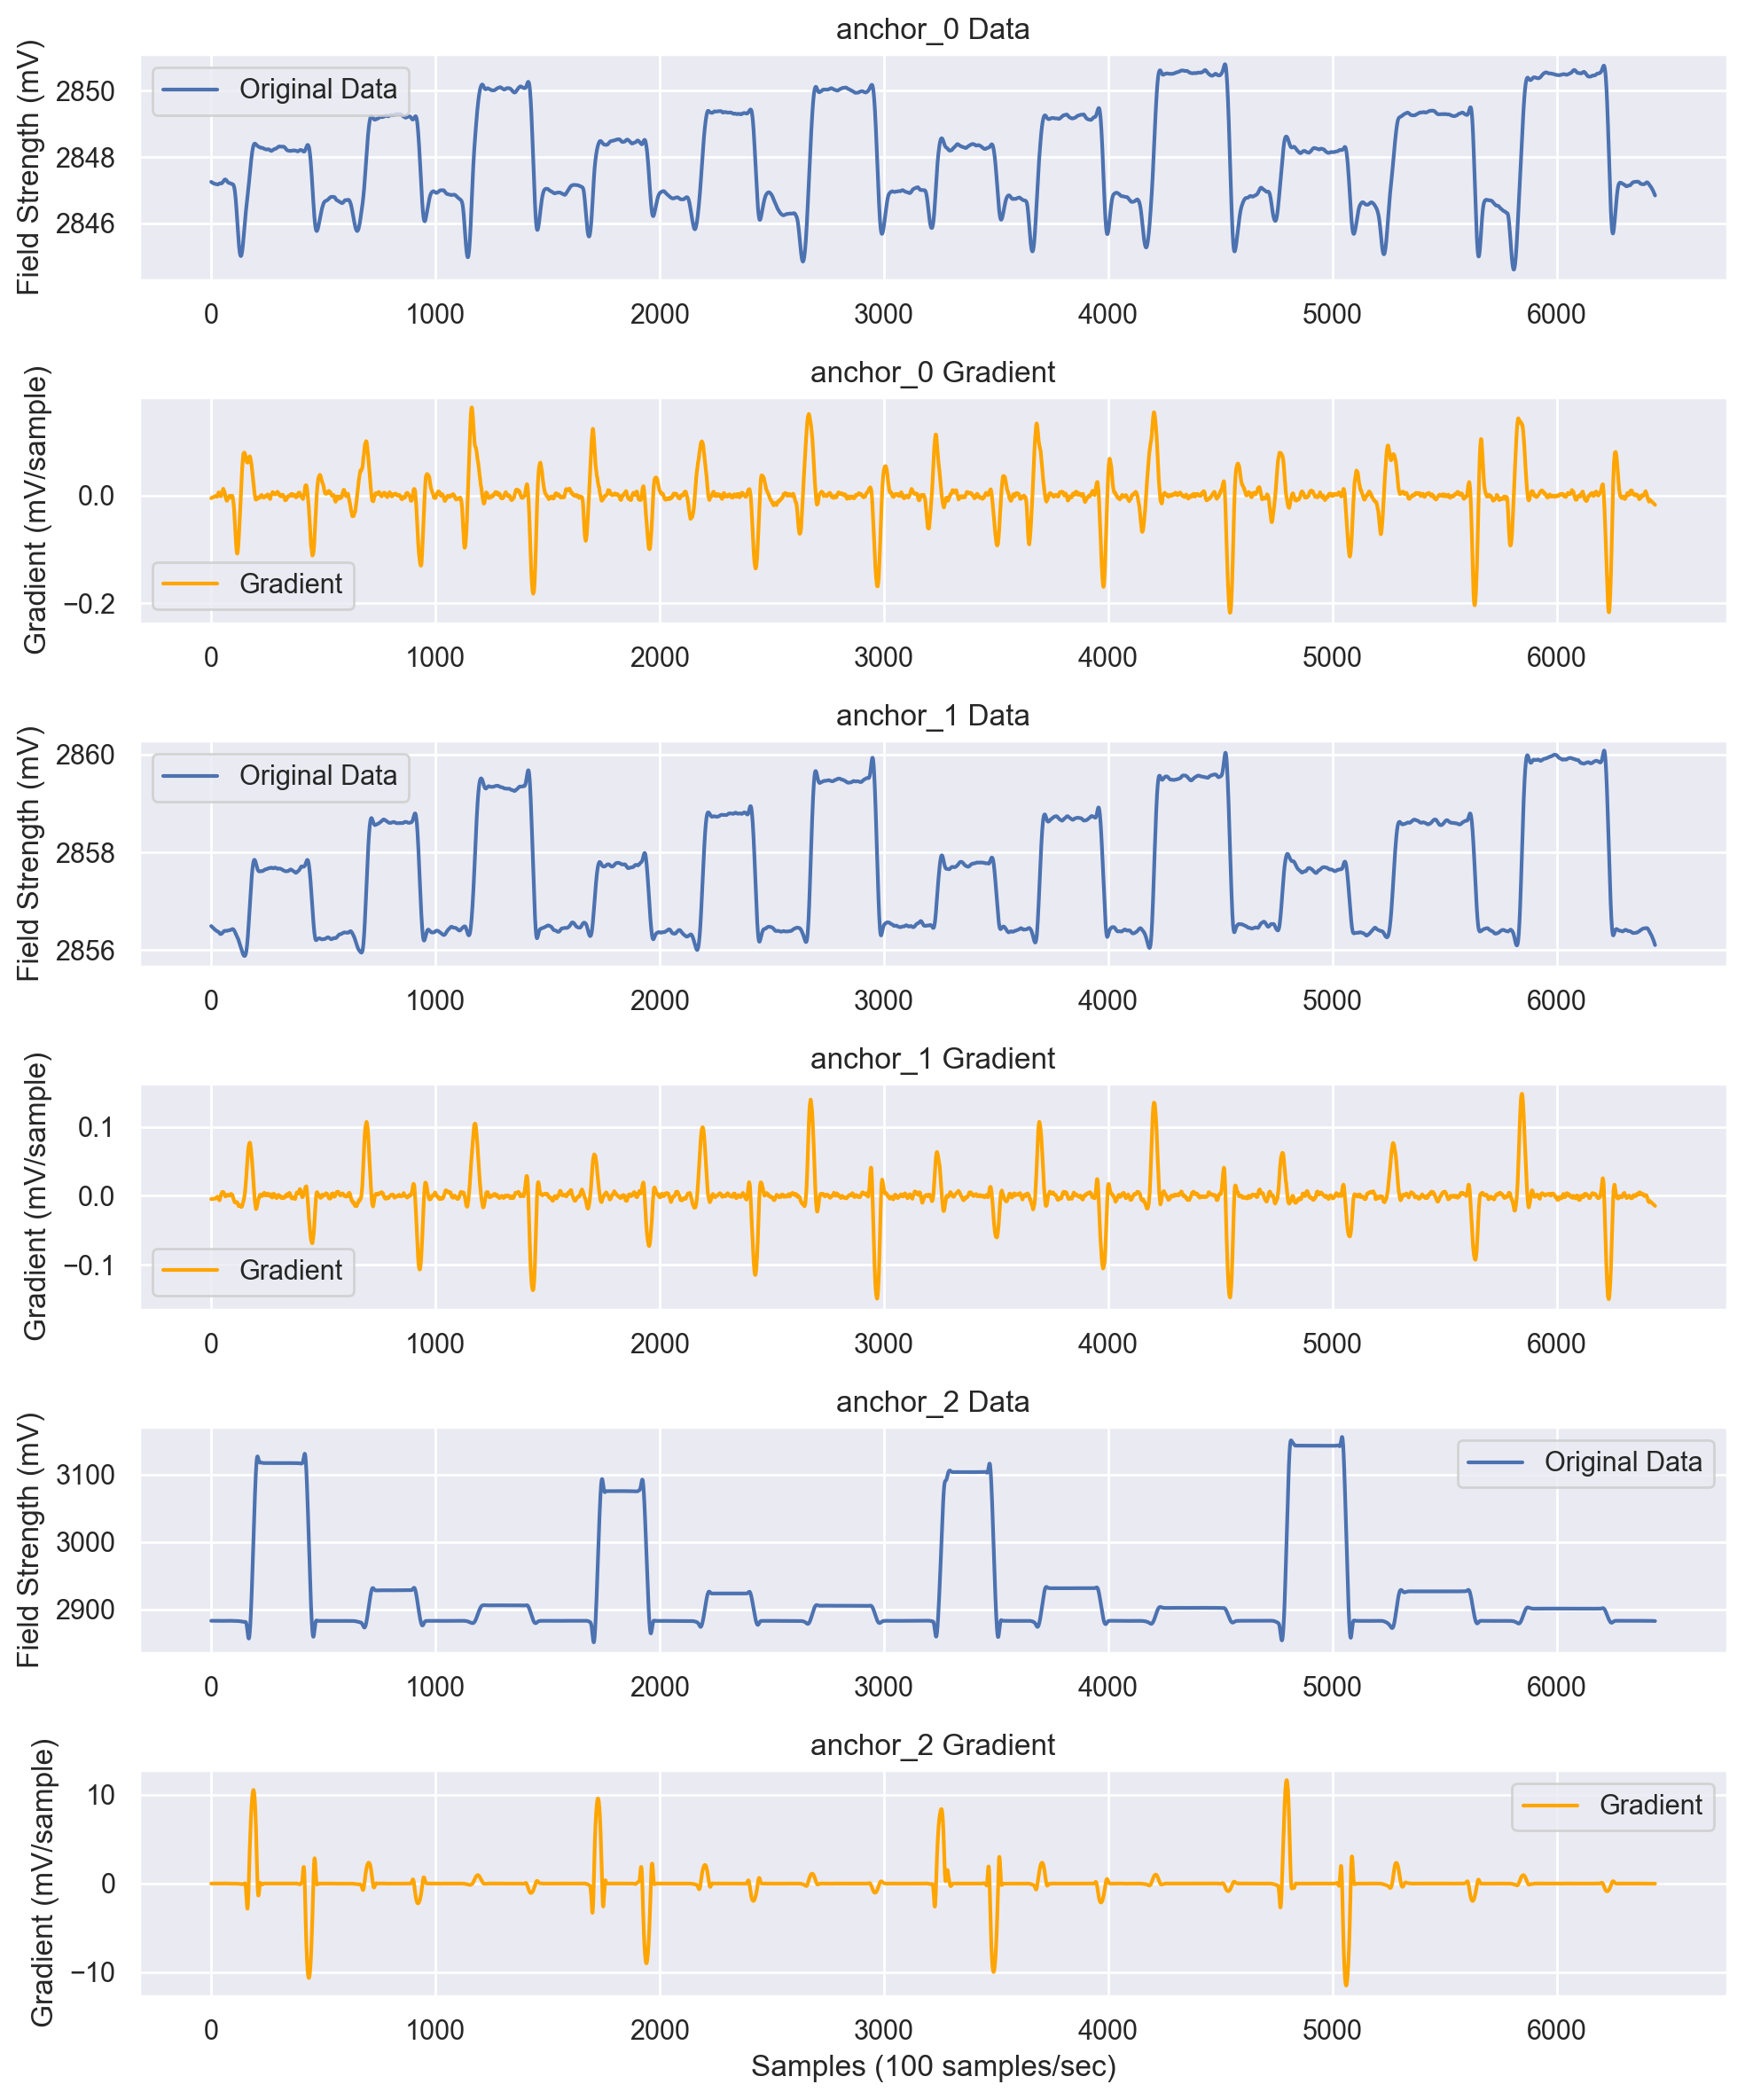

In [29]:
raw_df_anchor2_prm_place_diff_distance = pd.read_csv("./data/mar-20-prm-place-at-different-distance-anchor-2.txt", names=["anchor_0", "anchor_1", "anchor_2", "anchor_3", "anchor_4"])
plot_3_channels_with_gradients(raw_df=raw_df_anchor2_prm_place_diff_distance)

In [72]:
raw_df_plastic_IS_300 = pd.read_csv("./data/mar-21-comparison-among-soln-types/mar-21-plastic-IN-SULF-300ml.txt", names=["anchor_0", "anchor_1", "anchor_2", "anchor_3", "anchor_4"])

In [73]:
def compute_mse(data):
    # Calculate the ad-hoc sampling frequency
    data_len = data.shape[0]
    adhoc_fs = data_len / 53.0

    # Compute base chunk mean values
    base_chunk = data[0:int(4 * adhoc_fs), :]
    base_mean = np.mean(base_chunk, axis=0)

    # Initialize MSE results list with base mean values
    results = {'base': base_mean}

    # Define the positions chunks
    positions = [(5, 9), (15, 19), (25, 29), (35, 39)]

    # Loop through positions to compute mean and MSE
    for i, (start, end) in enumerate(positions, start=1):
        chunk = data[int(start * adhoc_fs):int(end * adhoc_fs), :]
        chunk_mean = np.mean(chunk, axis=0)
        mse = np.mean((chunk_mean - base_mean) ** 2)
        results[f'mse_p{i}'] = mse

    return results

# Example usage
# Assuming `data` is a numpy array of shape [data_len, 5]
# data = np.random.rand(1000, 5)  # Example data, replace with actual data
# results = compute_mse(data)
# print(results)

In [74]:
import os

# Define the directory containing the CSV files
directory = "./data/mar-21-comparison-among-soln-types"

# Loop through each file in the directory
for filename in os.listdir(directory):
    # Check if the file is a CSV
    if filename.endswith(".csv"):
        # Construct the full path to the file
        filepath = os.path.join(directory, filename)
        
        # Read the CSV file using pandas
        data = pd.read_csv(filepath).values  # Convert DataFrame to NumPy array for the function
        
        # Call the previously defined function to compute the MSE
        results = compute_mse(data)
        
        # Print the filename and the corresponding results
        print(f"Filename: {filename}, Results: {results}")